# Part A

## Question 1

### Define the Problem
Problem Statement

The venture capitalists aim to build a Financial Health Assessment Tool to evaluate the financial stability and creditworthiness of companies. The tool will assist in:

Debt Management Analysis: Identifying trends and assessing companies' ability to manage and fulfill their financial obligations effectively.
Credit Risk Evaluation: Estimating the risk of default through financial metrics like liquidity ratios, debt-to-equity ratios, and other indicators.
As a Data Scientist, your role is to develop a predictive model using the given dataset, which includes detailed financial metrics of companies. The model's objective is to classify companies as defaulters or non-defaulters, based on whether their Net Worth Next Year is positive or negative.

Key Deliverables:
Target Variable: "Net Worth Next Year" – Positive values indicate a non-defaulter, while negative values indicate a defaulter.
Model Inputs: Financial metrics like total assets, total liabilities, debt-to-equity ratio, and other balance sheet indicators.
Outcome: A robust machine learning model that predicts the likelihood of default.

enabling stakeholders to:
Identify companies at financial risk.
Make informed decisions about debt management and investments.
Business Impact: Facilitate proactive risk mitigation strategies and enhance the decision-making process for investors and businesses.

In [1]:
%pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [3]:
funda_data = pd.read_csv('./data/Company29.csv')
funda_data.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

### Check shape

In [4]:
print(f'Data has {funda_data.shape[0]} rows/observations.')
print(f'Data has {funda_data.shape[1]} columns/features.')

Data has 4256 rows/observations.
Data has 51 columns/features.


### Check Data Types

In [5]:
funda_data.info()
print(f'50 columns/features are of data type float.')
print('One column "Num" is of datatype int and is an identfier')
print('converting column "Num" to string and making it the index')
funda_data.Num = funda_data.Num.astype(str)
funda_data = funda_data.set_index(keys='Num')
funda_data.info()
funda_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

Networth Next Year  Total assets  Net worth  Total income  \
Num                                                              
1                 395.3         827.6      336.5         534.1   
2                  36.2          67.7       24.3         137.9   
3                  84.0         238.4       78.9         331.2   
4                2041.4        6883.5     1443.3        8448.5   
5                  41.8          90.9       47.0         388.6   

     Change in stock  Total expenses  Profit after tax  PBDITA    PBT  \
Num                                                                     
1               13.5           508.7              38.9   124.4   64.6   
2               -3.7           131.0               3.2     5.5    1.0   
3              -18.1           309.2               3.9    25.8   10.5   
4              212.2          8482.4             178.3   418.4  185.1   
5                3.4           392.7              -0.7     7.2   -0.6   

     Cash profit  ...  Debtors turnover  Finished goods turnover  \
Num               ...                                              
1           95.2  ...              5.65                     3.99   
2            3.8  ...               NaN                      NaN   
3            9.4  ...              2.51                    17.67   
4          178.0  ...              1.91                    18.14   
5            3.9  ...             68.00                    45.87   

     WIP turnover  Raw material turnover  Shares outstanding  \
Num                                                            
1            3.37                  14.87           8760056.0   
2             NaN                    NaN                 NaN   
3            8.76                   8.35                 NaN   
4           18.62                  11.11          10000000.0   
5           28.67                  19.93            107315.0   

     Equity face value    EPS  Adjusted EPS  Total liabilities  PE on BSE  
Num                                                                        
1                 10.0   4.44          4.44              827.6        NaN  
2                  NaN   0.00          0.00               67.7        NaN  
3                  NaN   0.00          0.00              238.4        NaN  
4                 10.0  17.60         17.60             6883.5        NaN  
5                100.0  -6.52         -6.52               90.9        NaN  

[5 rows x 50 columns]

### Statistical Summary

In [6]:
print('There are substantial differences in scale among variables.')
print('Equity Face value has same value in the three percentiles, the value is 10, most of the values in this column as similar')
print('There are missing values for quite a few values and we will need treat them.')
pd.set_option('display.float_format', lambda x: '%.f' % x)
funda_data.describe().T


There are substantial differences in scale among variables.
Equity Face value has same value in the three percentiles, the value is 10, most of the values in this column as similar
There are missing values for quite a few values and we will need treat them.


count     mean       std  \
Networth Next Year                            4256     1345     15937   
Total assets                                  4256     3574     30074   
Net worth                                     4256     1352     12961   
Total income                                  4025     4688     53919   
Change in stock                               3706       44       437   
Total expenses                                4091     4356     51398   
Profit after tax                              4102      295      3080   
PBDITA                                        4102      606      5646   
PBT                                           4102      410      4217   
Cash profit                                   4102      408      4144   
PBDITA as % of total income                   4177        3       172   
PBT as % of total income                      4177      -18       420   
PAT as % of total income                      4177      -20       424   
Cash profit as % of total income              4177       -9       300   
PAT as % of net worth                         4256       10        62   
Sales                                         3951     4646     53081   
Income from fincial services                  3145       81      1043   
Other income                                  2700       56      1178   
Total capital                                 4251      225      1685   
Reserves and funds                            4158     1211     12816   
Borrowings                                    3825     1176      8581   
Current liabilities & provisions              4146      961      9141   
Deferred tax liability                        2887      234      2106   
Shareholders funds                            4256     1376     13011   
Cumulative retained profits                   4211      937      9853   
Capital employed                              4256     2434     20496   
TOL/TNW                                       4256        4        21   
Total term liabilities / tangible net worth   4256        2        16   
Contingent liabilities / Net worth (%)        4256       56       369   
Contingent liabilities                        2854      949     12057   
Net fixed assets                              4124     1209     12502   
Investments                                   2541      722      6794   
Current assets                                4176     1350     10156   
Net working capital                           4219      163      3182   
Quick ratio (times)                           4151        1         9   
Current ratio (times)                         4151        2        12   
Debt to equity ratio (times)                  4256        3        16   
Cash to current liabilities (times)           4151        1         5   
Cash to average cost of sales per day         4156      145      2522   
Creditors turnover                            3865       17        76   
Debtors turnover                              3871       18        90   
Finished goods turnover                       3382       84       563   
WIP turnover                                  3492       29       170   
Raw material turnover                         3828       18       343   
Shares outstanding                            3446 23764910 170979041   
Equity face value                             3446    -1095     34101   
EPS                                           4256     -196     13062   
Adjusted EPS                                  4256     -198     13062   
Total liabilities                             4256     3574     30074   
PE on BSE                                     1629       55      1304   

                                                    min     25%     50%  \
Networth Next Year                               -74266       4      72   
Total assets                                          0      91     316   
Net worth                                             0      31     105   
Total income         

#### Univariate Analysis

All the columns have outliers, we would need to treat them.


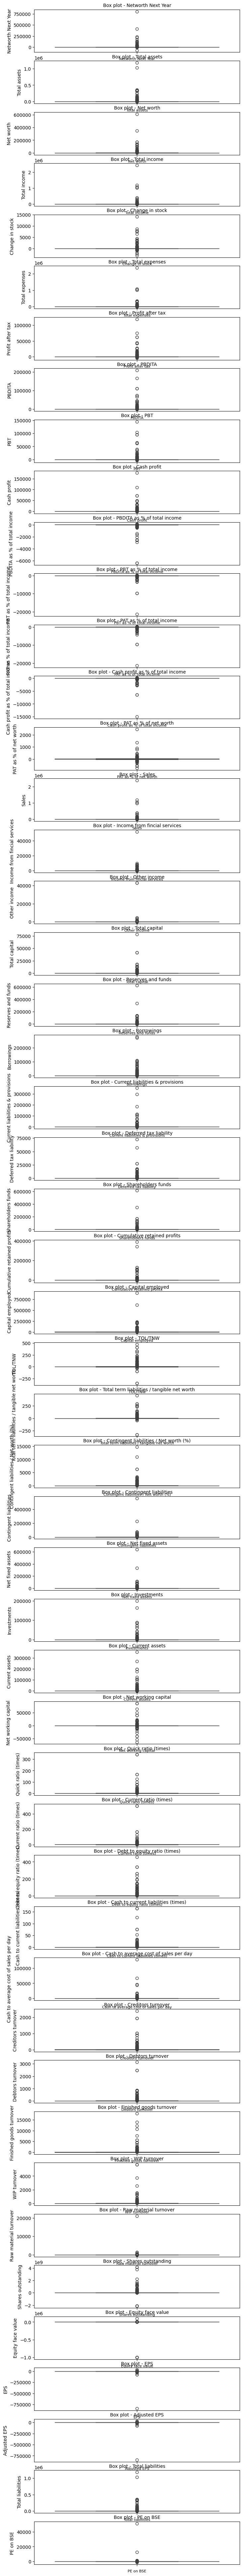

In [7]:
print('All the columns have outliers, we would need to treat them.')
fig, ax = plt.subplots(len(funda_data.columns), figsize=(8,100))

for i, col_val in enumerate(funda_data.columns):

    sns.boxplot(y=funda_data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.savefig('./images/Blox_plots_before_Scaling.svg')
plt.show()

#### Multivariate Analysis

In [8]:
funda_data.columns
print('spilt the data into managable columnsets to do pairplots')

colset1 = ['Networth Next Year', 'Total assets','Total liabilities', 'Net worth', 'Total income',
       'Change in stock', 'Total expenses', 'Profit after tax', 'PBDITA',
       'PBT', 'Cash profit']
colset2 = ['Networth Next Year','PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth']
colset3 = ['Networth Next Year', 'Sales',
       'Income from fincial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed',]
colset4 = ['Networth Next Year', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)']
colset5 = ['Networth Next Year','Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital']
colset6 = ['Networth Next Year','Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average cost of sales per day','PE on BSE']
colset7 = ['Networth Next Year','Creditors turnover',
       'Debtors turnover', 'Finished goods turnover', 'WIP turnover',
       'Raw material turnover']
colset8 =['Networth Next Year','Shares outstanding', 'Equity face value',
       'EPS', 'Adjusted EPS']


spilt the data into managable columnsets to do pairplots


The pairpolt show weak and relations of "Networth Next Year" with the non ratio features.
The pairpolt no relations of "Networth Next Year" with the ratio features.
The pairpolt relations of between the non ratio and ratio features.


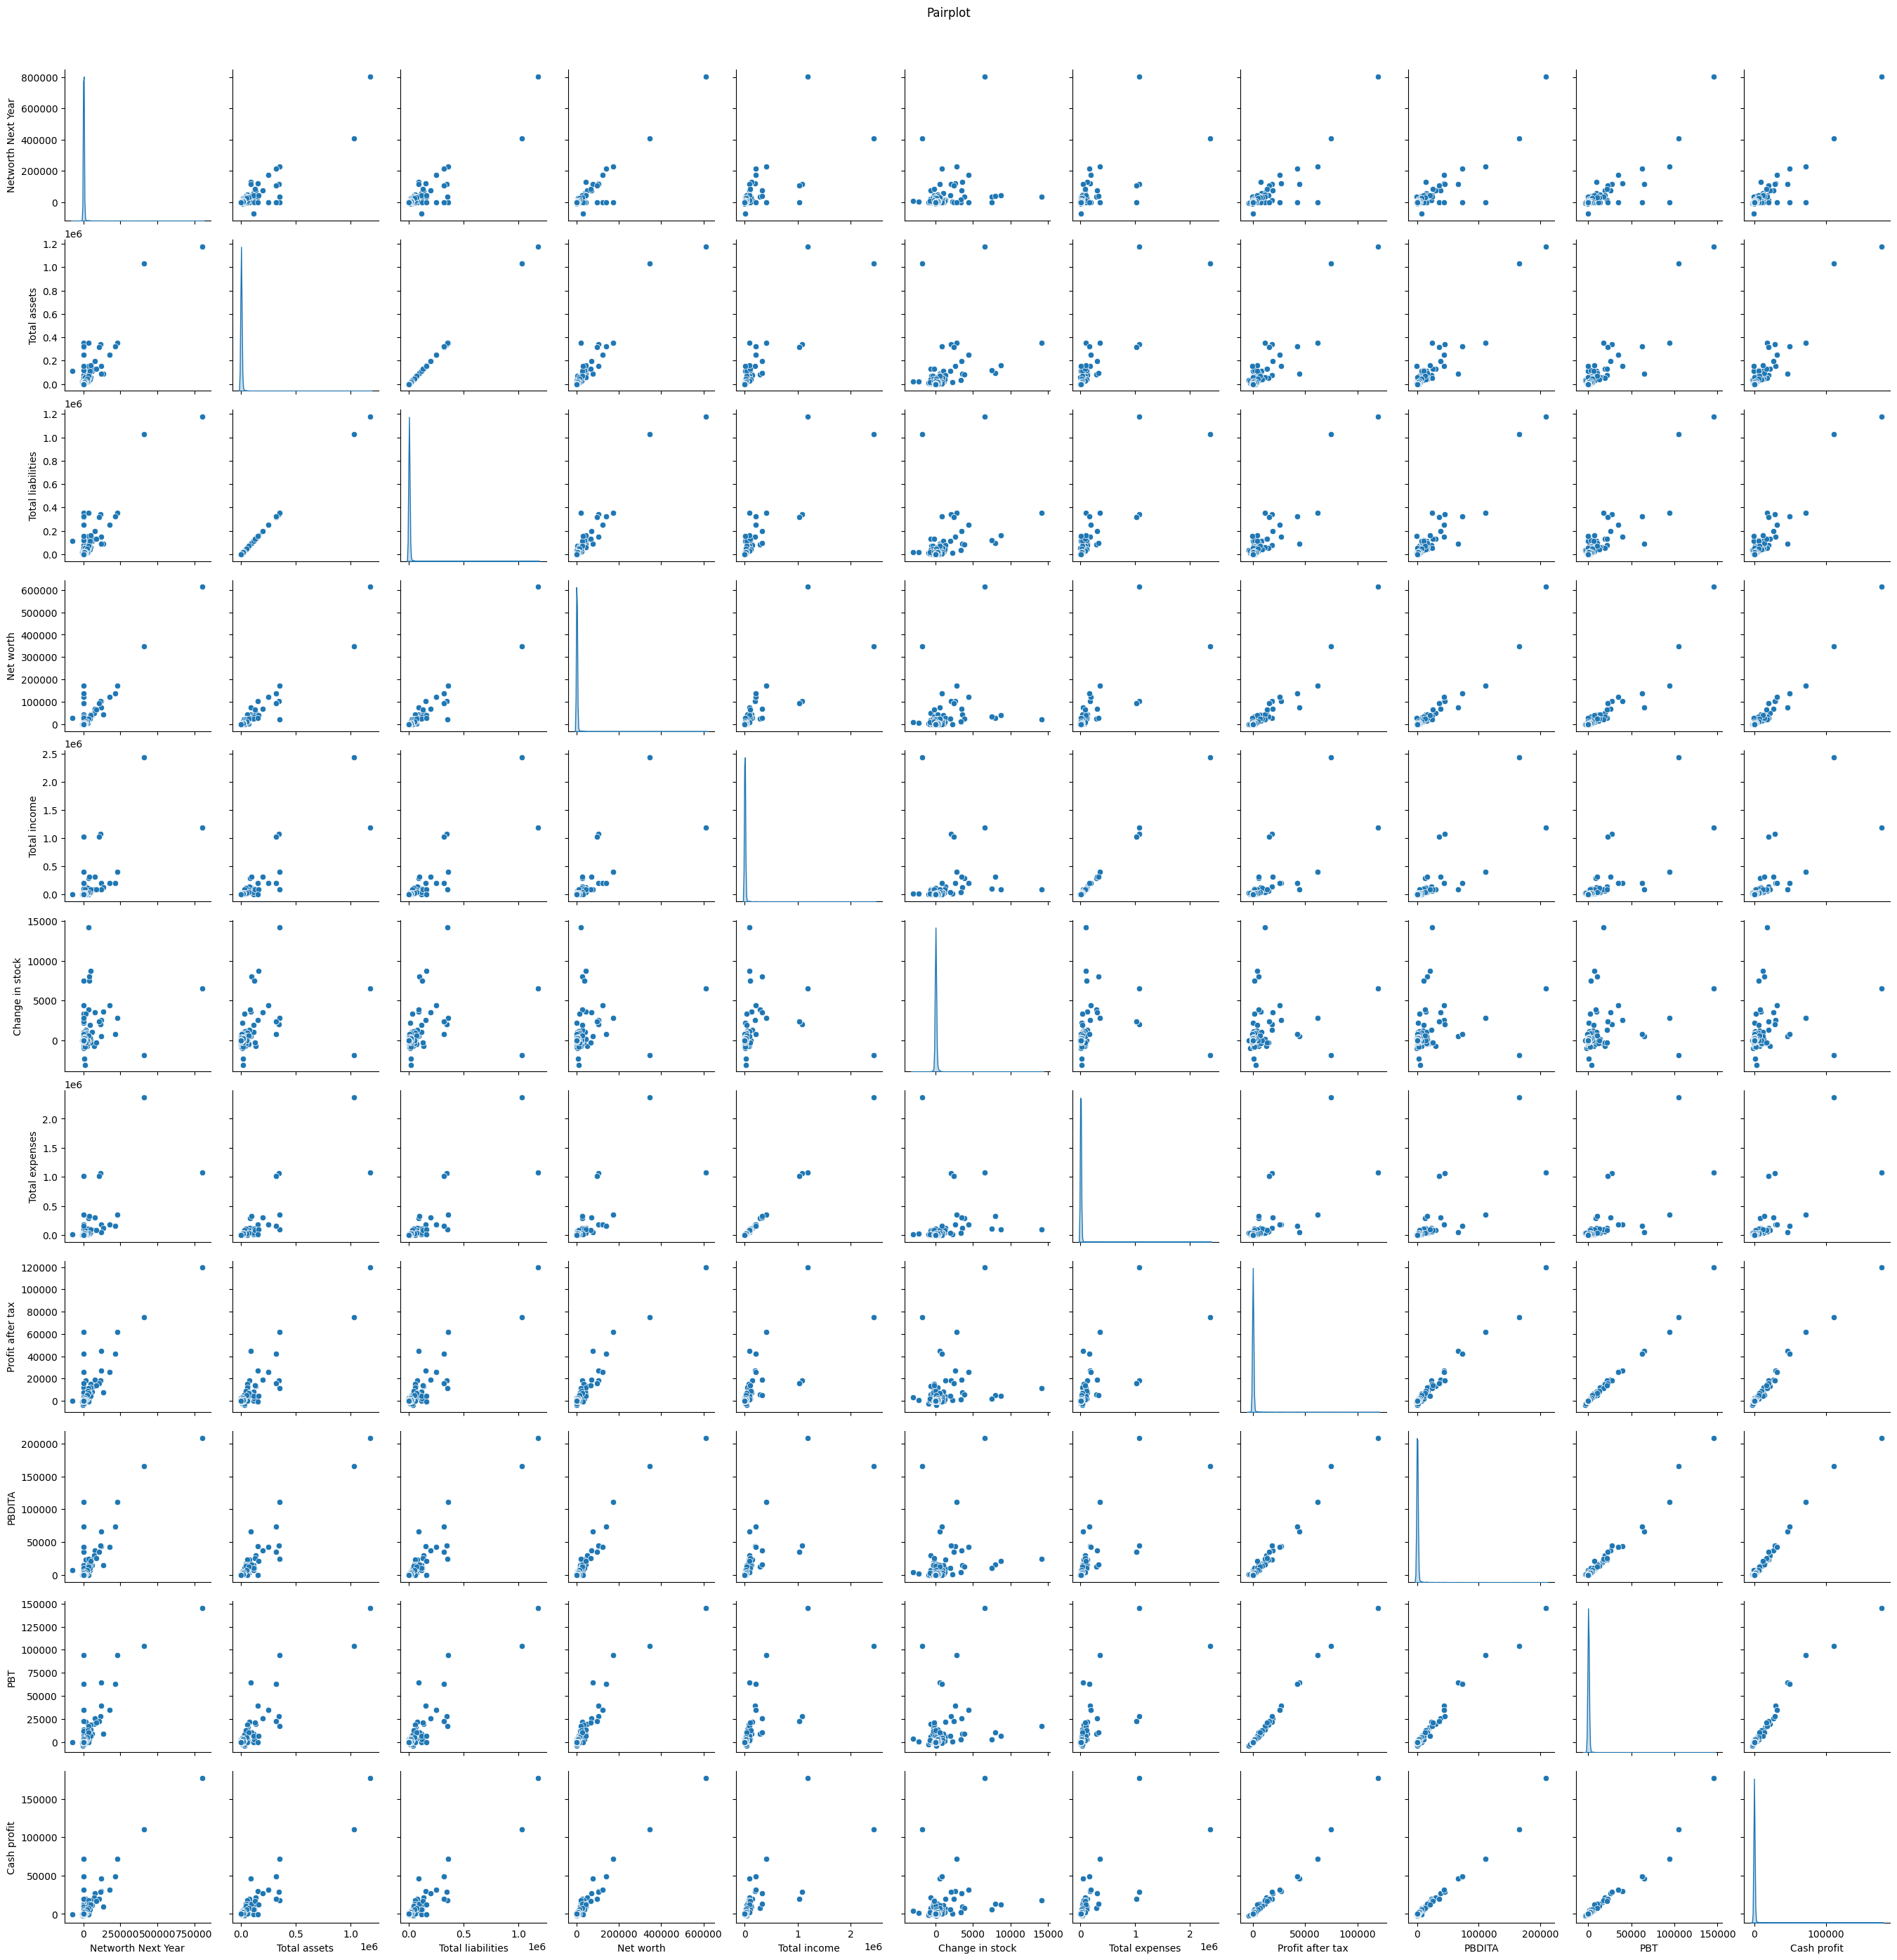

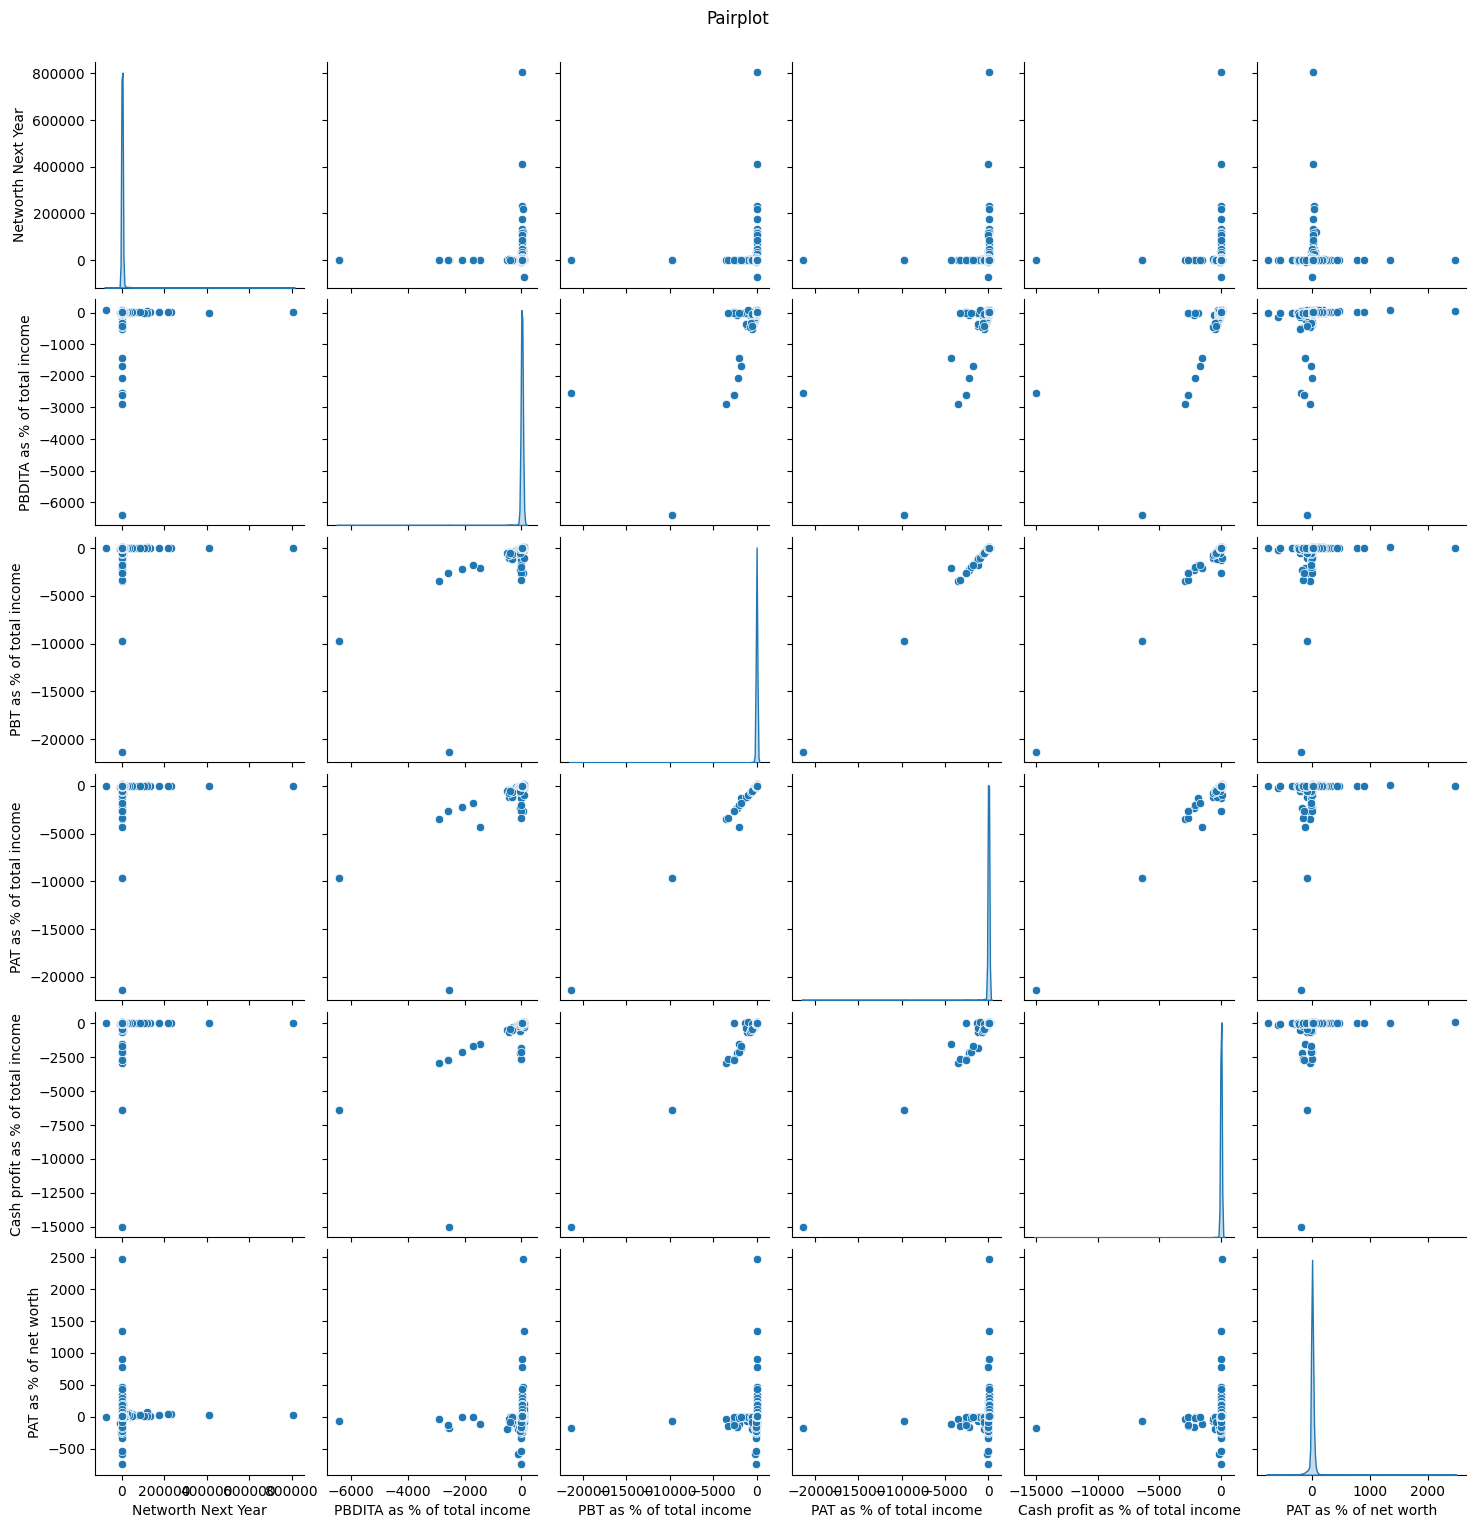

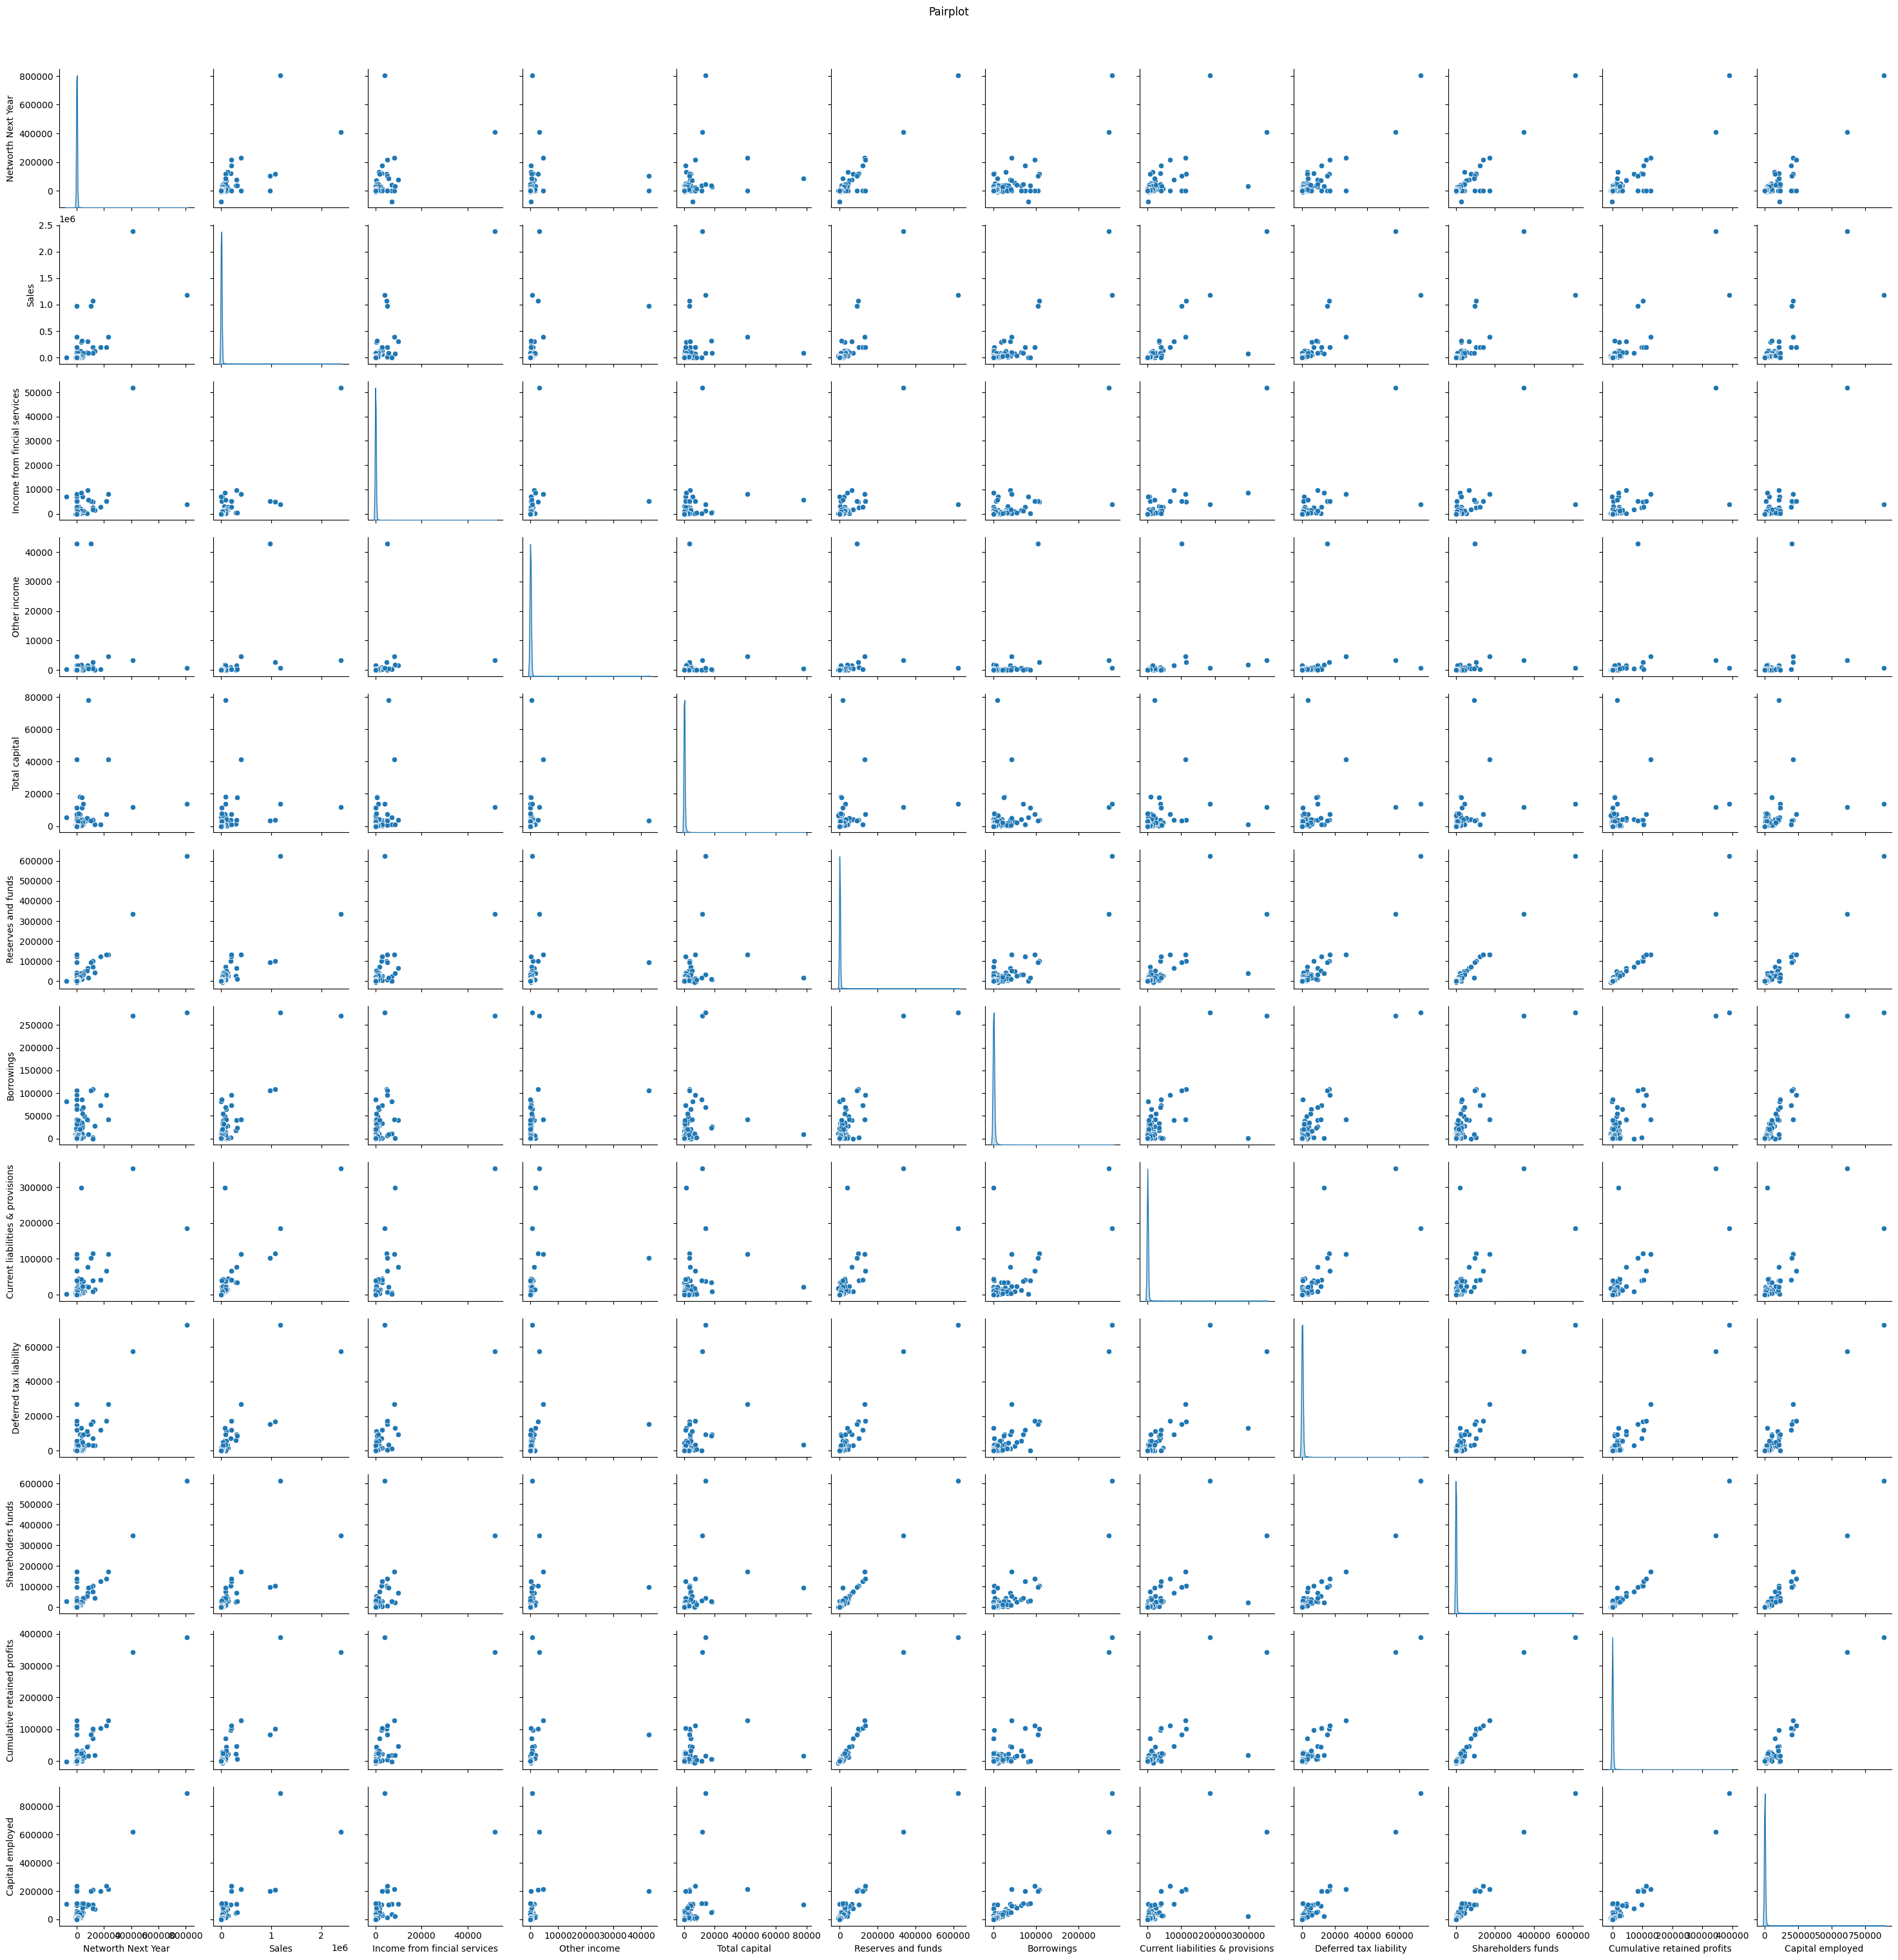

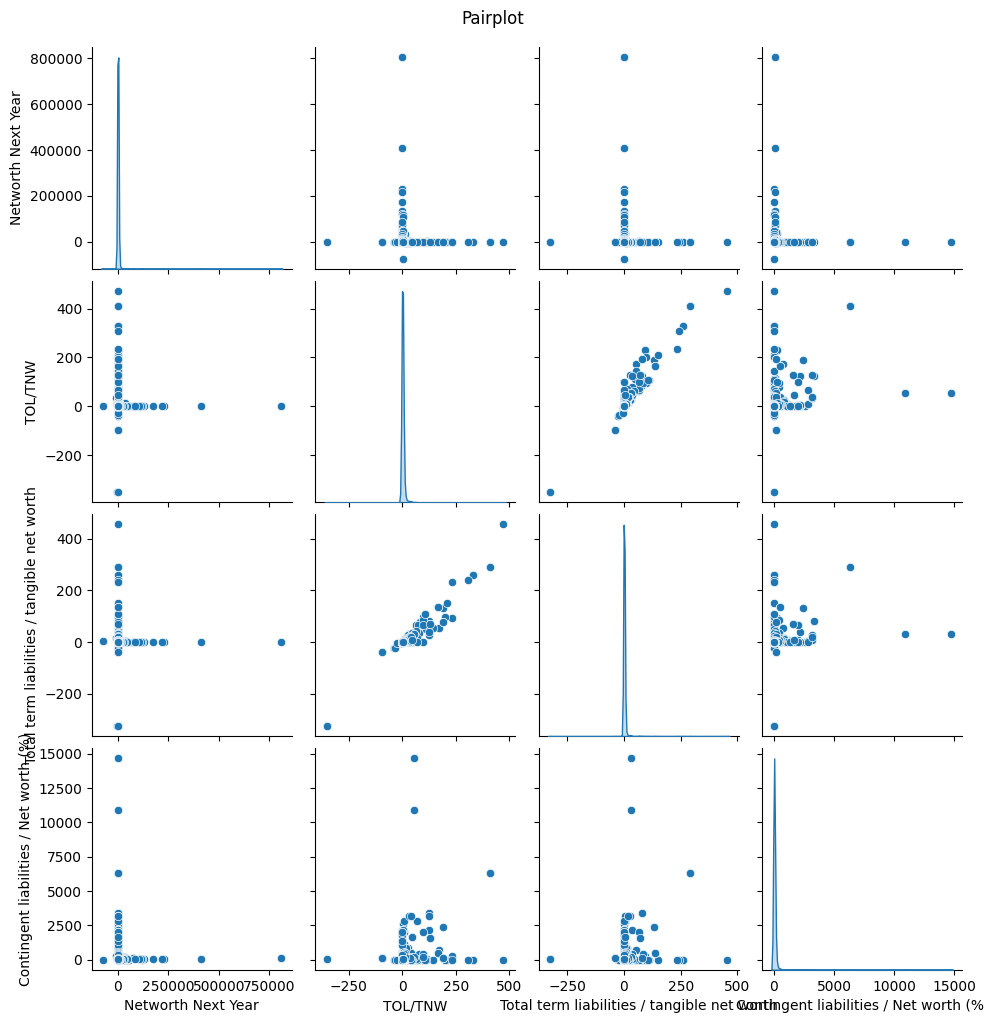

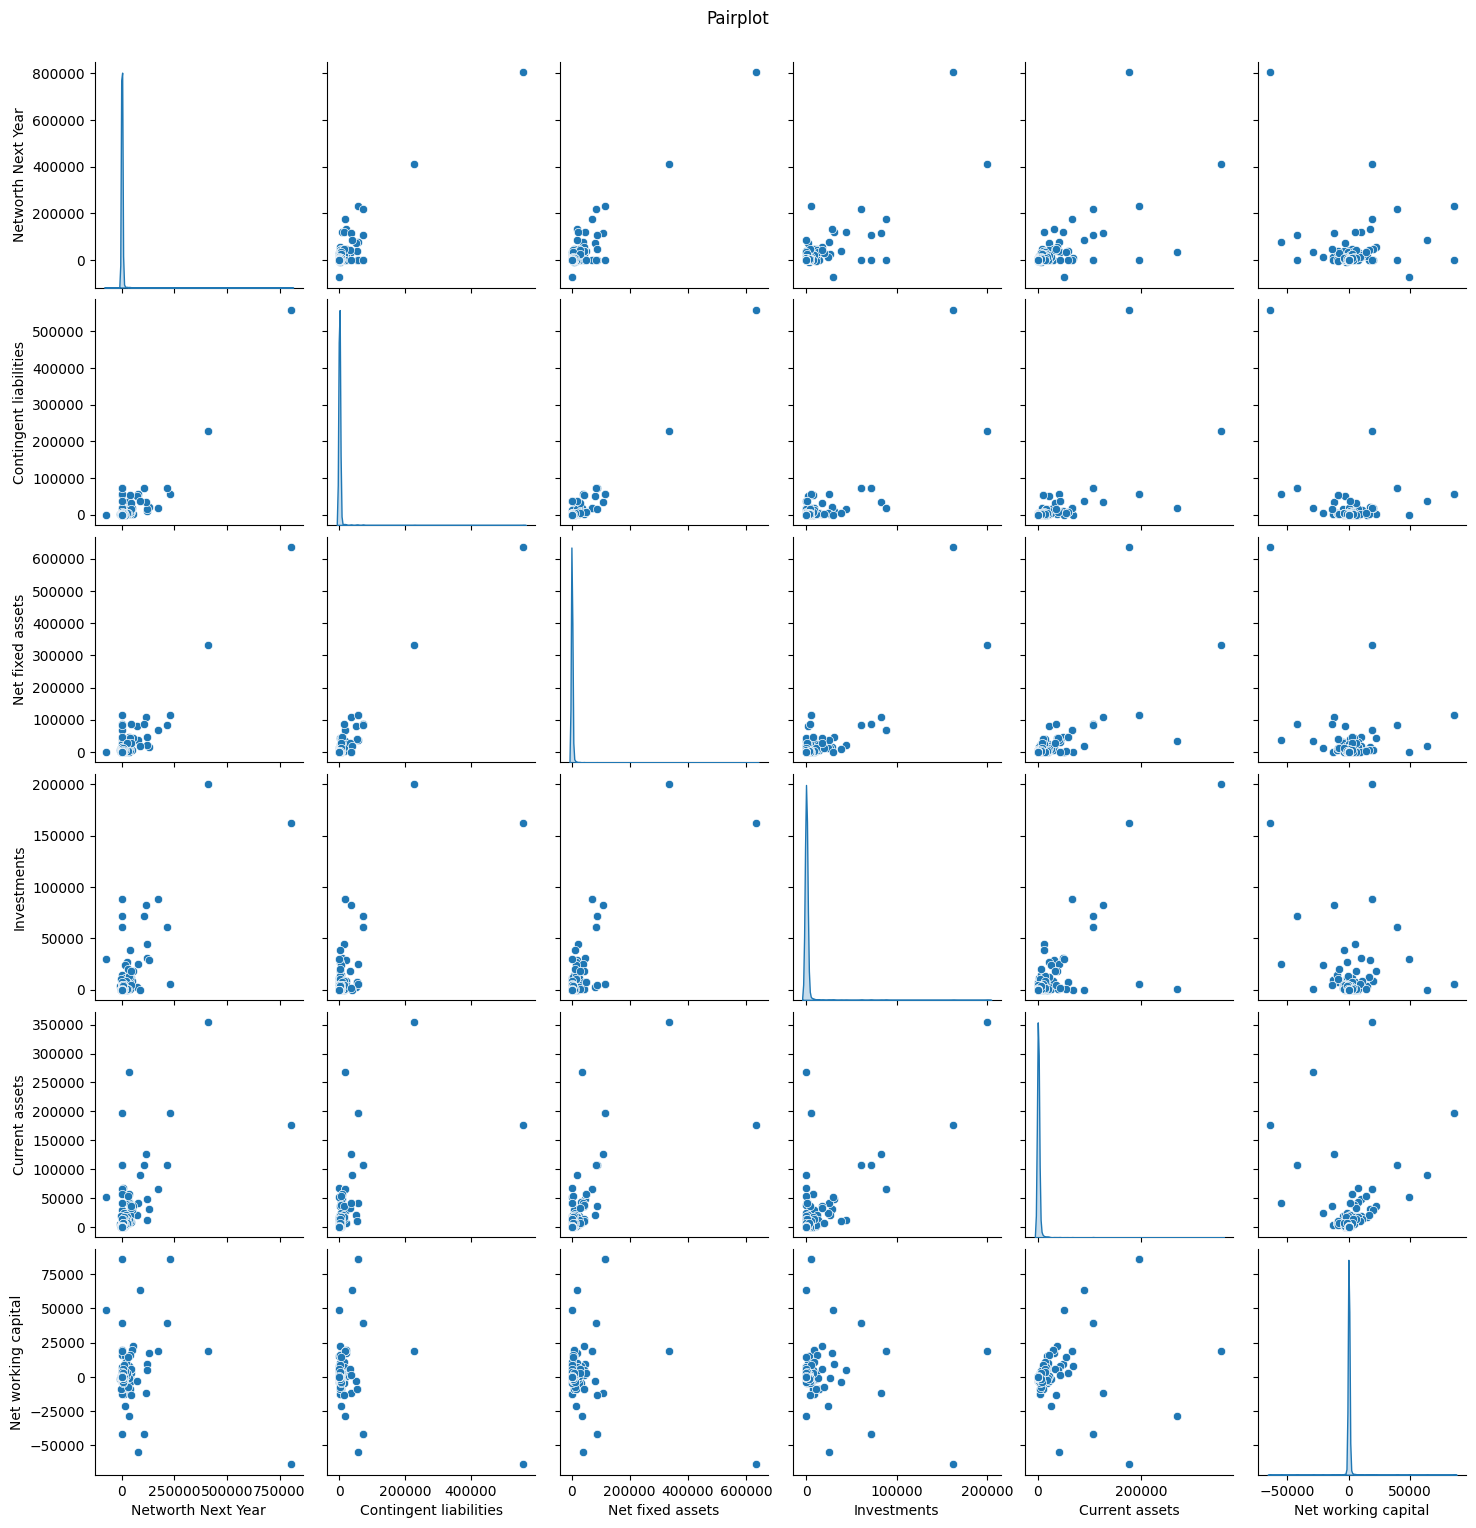

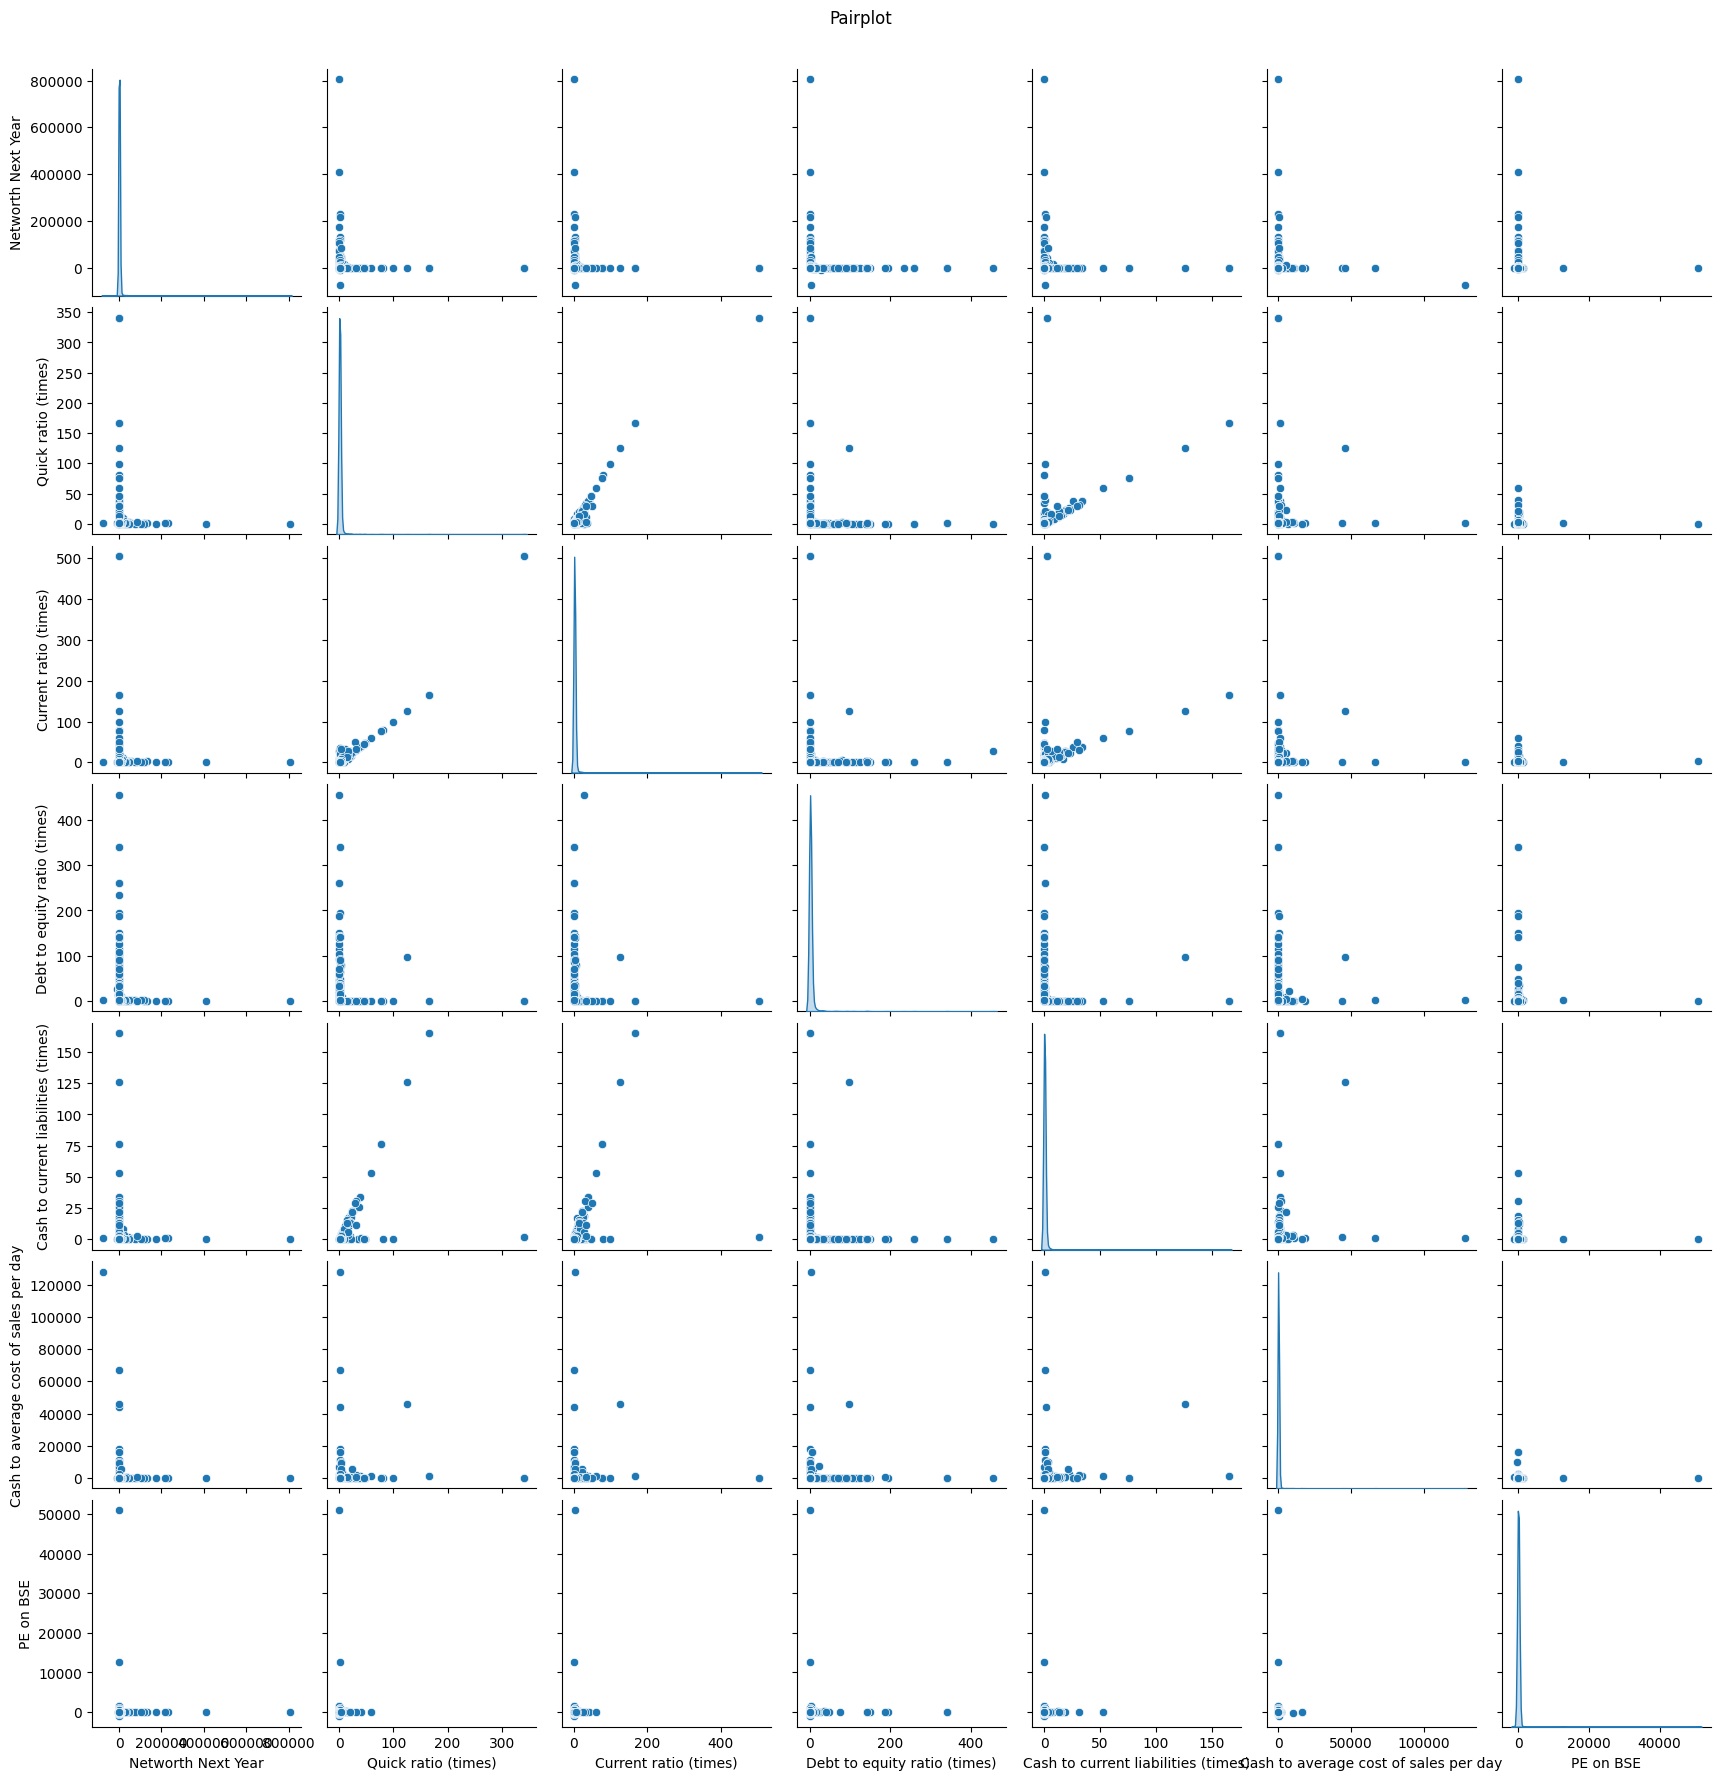

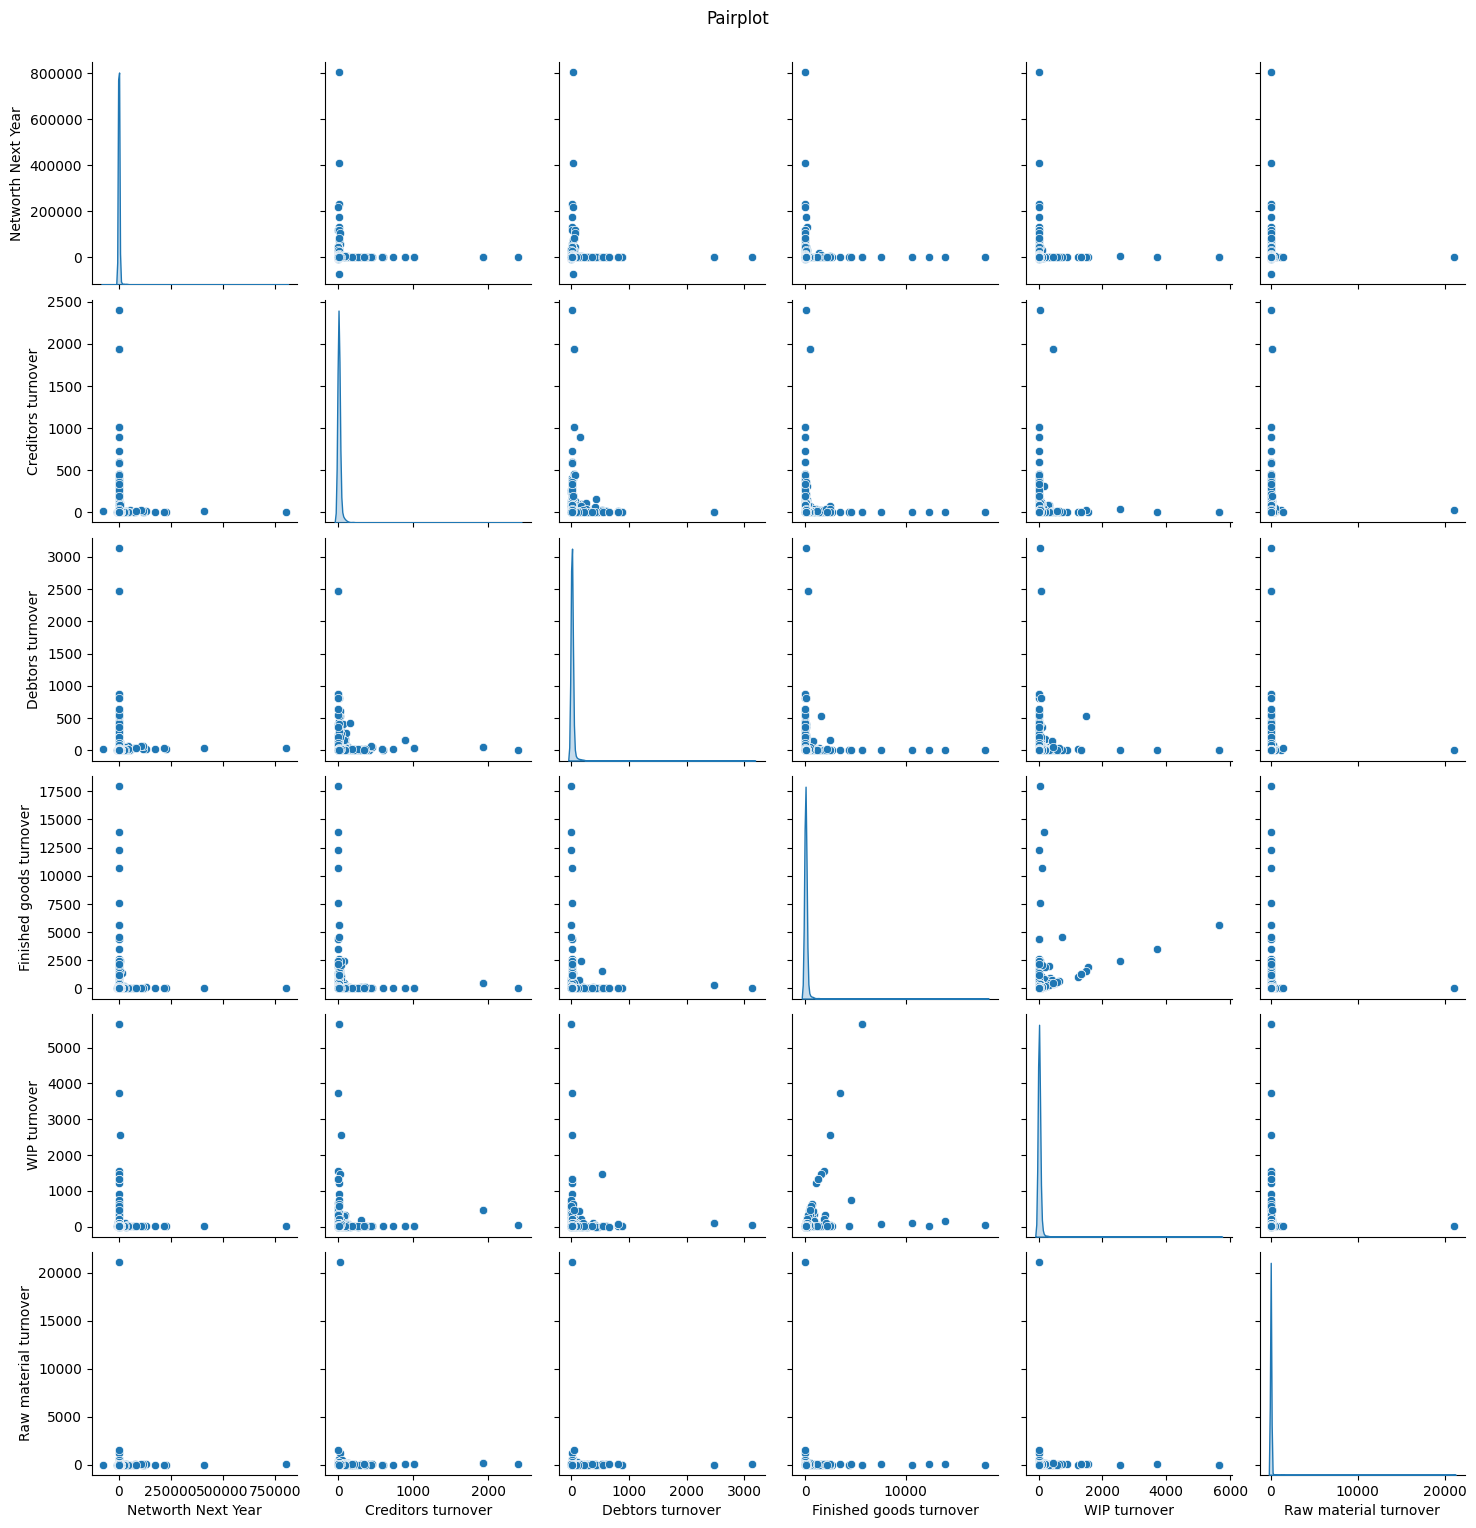

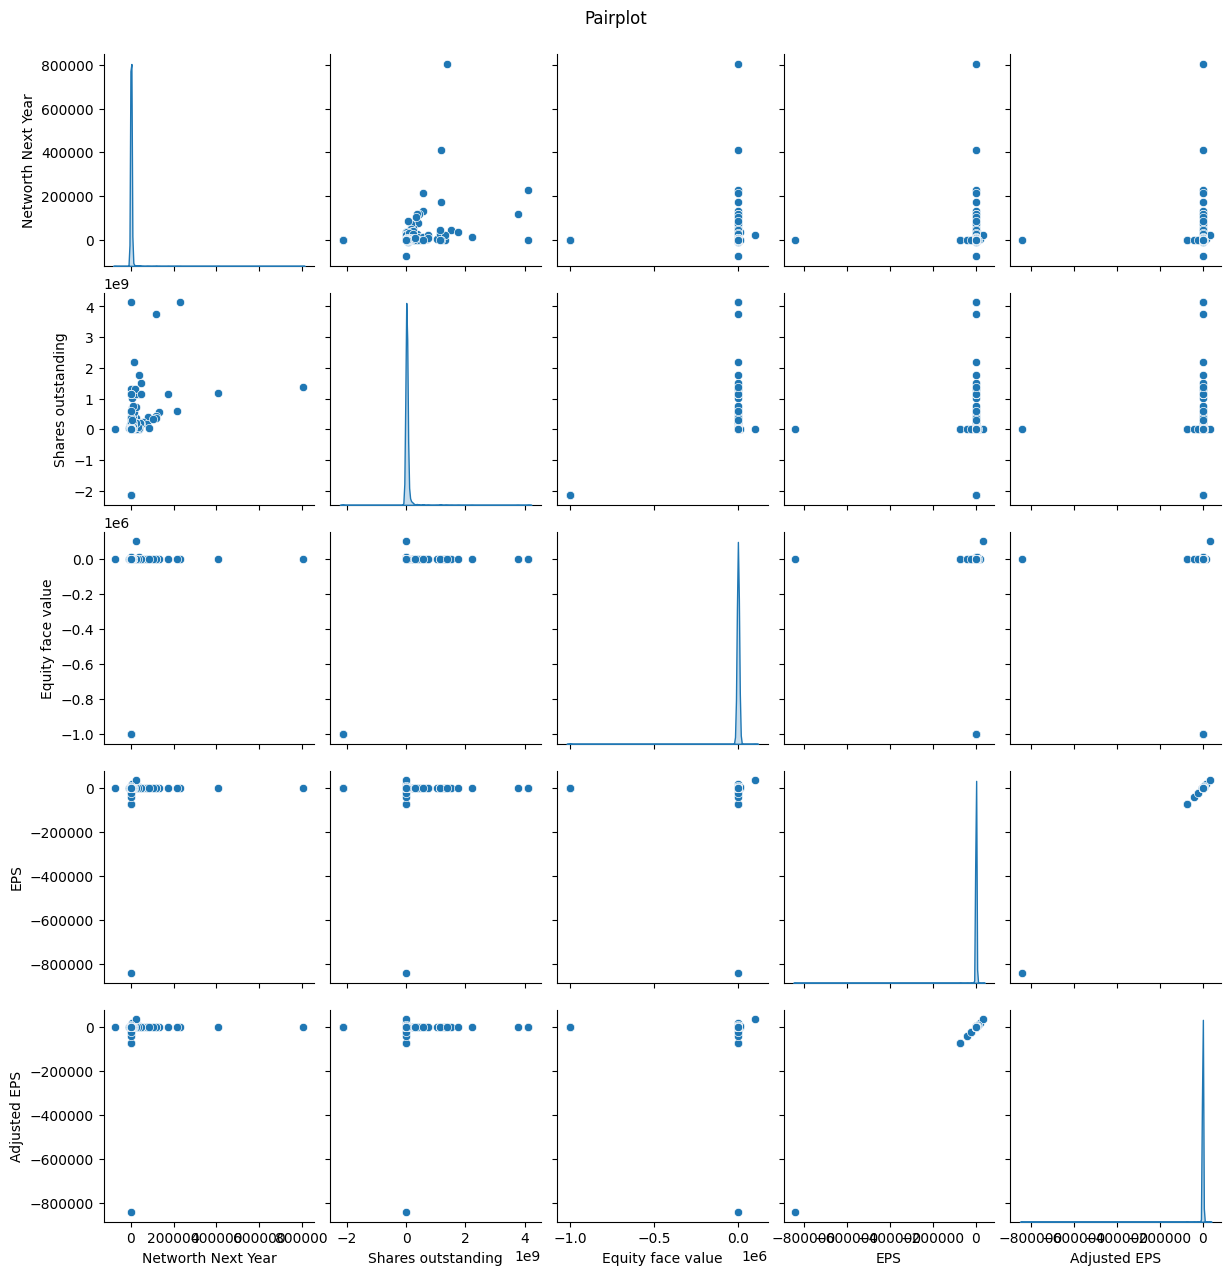

In [9]:
print('The pairpolt show weak and relations of "Networth Next Year" with the non ratio features.')
print('The pairpolt no relations of "Networth Next Year" with the ratio features.')
print('The pairpolt relations of between the non ratio and ratio features.')

sns.pairplot(funda_data[colset1], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.savefig('./images/colset1.jpg')
plt.show()
sns.pairplot(funda_data[colset2], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.savefig('./images/colset2.jpg')
plt.show()
sns.pairplot(funda_data[colset3], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.savefig('./images/colset3.jpg')
plt.show()
sns.pairplot(funda_data[colset4], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.savefig('./images/colset4.jpg')
plt.show()
sns.pairplot(funda_data[colset5], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.savefig('./images/colset5.jpg')
plt.show()
sns.pairplot(funda_data[colset6], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.savefig('./images/colset6.jpg')
plt.show()
sns.pairplot(funda_data[colset7], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.savefig('./images/colset7.jpg')
plt.show()
sns.pairplot(funda_data[colset8], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.savefig('./images/colset8.jpg')
plt.show()

The heatmap shows high corelation of "Networth Next Year", with ~19 features.
The heatmap shows high corelation between a features which points us in the direction of the need for feature elimination using techinque like pvalue or VIF


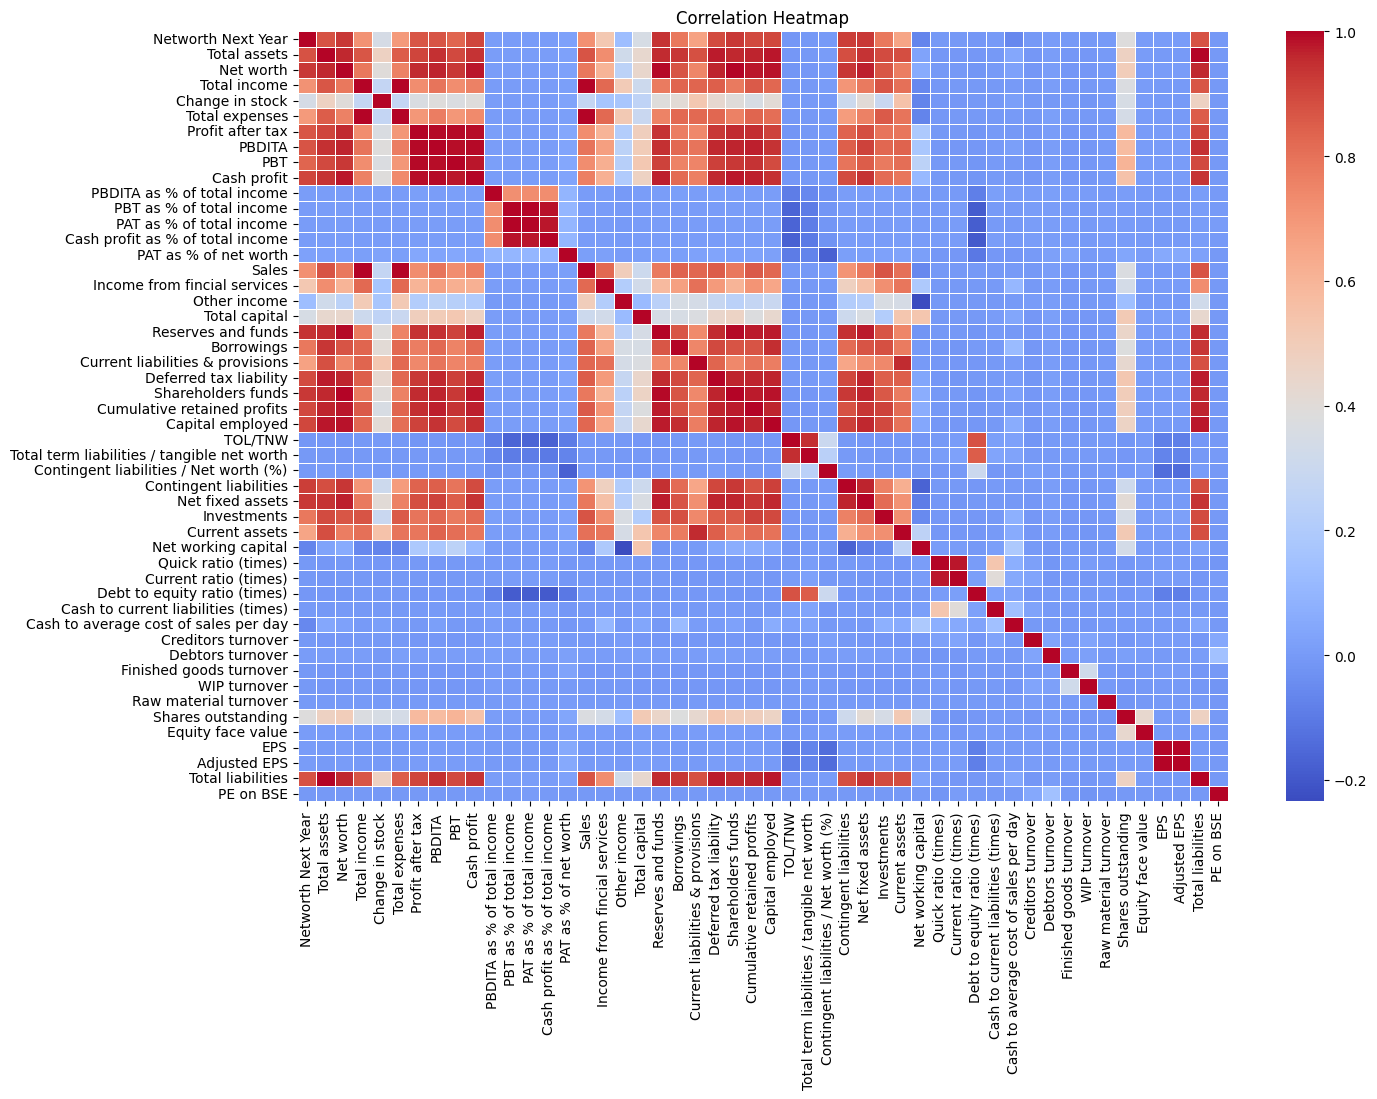

In [10]:
print('The heatmap shows high corelation of "Networth Next Year", with ~19 features.')
print('The heatmap shows high corelation between a features which points us in the direction of the need for feature elimination using techinque like pvalue or VIF')
# Correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = funda_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('./images/Heatmap.svg')
plt.show()

### Key meaningful observations
- There are substantial differences in scale among variables.
- Equity Face value has same value in the three percentiles, the value is 10, most of the values in this column as similar.
- There are missing values for quite a few values and we will need treat them.
- All the columns have outliers, we would need to treat them.
- The pairpolt show weak and relations of "Networth Next Year" with the non ratio features.
- The pairpolt no relations of "Networth Next Year" with the ratio features.
- The pairpolt relations of between the non ratio and ratio features.
- The heatmap shows high corelation of "Networth Next Year", with ~19 features.
- The heatmap shows high corelation between a features which points us in the direction of the need for feature elimination using techinque like pvalue or VIF.


## Question 2

### Data Pre-processing

#### Missing Value treatment

In [11]:
funda_data.isnull().sum().sum()
print(f'There are {funda_data.isnull().sum().sum()} missing values of total {funda_data.shape[0]*funda_data.shape[1]} values.')
print(f'Percentage of missing = {(17778/212800)*100}')
print(f'There are {funda_data[funda_data.isnull().sum(axis=1) > 5].isnull().sum(axis=1).count()} rows with great than 5 missing values.')
print(f'Percentage of rows missing more than 5 values = {(1062 /4256)*100}')
print('A lot of values are missing we will use KNN to impute missing values')


There are 17778 missing values of total 212800 values.
Percentage of missing = 8.354323308270677
There are 1062 rows with great than 5 missing values.
Percentage of rows missing more than 5 values = 24.953007518796994
A lot of values are missing we will use KNN to impute missing values


##### KNN Imputer

In [12]:
knn_imputer = KNNImputer(n_neighbors=5)
funda_data_imputted = pd.DataFrame(knn_imputer.fit_transform(funda_data), columns=funda_data.columns)
funda_data_imputted.isnull().sum()

Networth Next Year                             0
Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Income from fincial services                   0
Other income                                   0
Total capital                                  0
Reserves and funds                             0
Borrowings          

#### Outlier treatment
All Columns/Features have outliers
We will treat as we want to go Logistic regression in addition to other classification models.

In [13]:
# Checking for outliers
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
num=0
for col in funda_data_imputted.columns:
    num+=1
    lower_range, upper_range = check_outlier(funda_data_imputted[col])
    print(num,lower_range, upper_range)

1 -486.29999999999995 821.0999999999999
2 -1452.95 2665.05
3 -506.0875 927.4125
4 -1897.4 3387.7200000000003
5 -24.2625 37.7575
6 -1806.3249999999998 3227.2749999999996
7 -76.0875 127.61250000000001
8 -210.03750000000002 365.26250000000005
9 -104.53750000000001 175.5625
10 -131.45 225.42999999999998
11 -12.651250000000001 33.87875
12 -12.166249999999998 21.503749999999997
13 -8.865 15.495000000000001
14 -11.20875 23.80125
15 -30.30375 50.50625
16 -1845.1 3297.2999999999997
17 -9.25 16.27
18 -4.869999999999999 8.969999999999999
19 -121.31249999999999 237.3875
20 -398.01249999999993 674.2874999999999
21 -452.1 801.5
22 -345.275 616.125
23 -49.76499999999999 88.435
24 -532.6 973.8
25 -302.1375 505.52250000000004
26 -1032.2000000000003 1883.8000000000002
27 -2.7449999999999997 6.175
28 -1.3749999999999998 2.425
29 -46.51875 77.53125
30 -144.63750000000002 246.66250000000002
31 -442.74999999999994 800.05
32 -42.150000000000006 74.25
33 -671.5 1207.7
34 -130.85 215.15
35 -0.5800000000000003 

In [15]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    #print("5th Percentile:", q5)
    #print("25th Percentile:", q25)
    #print("75th Percentile:", q75)
    #print("95th Percentile:", q95)
    #print("Lower Bound:", lower_bound)
    #print("Upper Bound:", upper_bound)
    ##Capping outliers
    return x.apply(lambda y: q75 if y > upper_bound else y).apply(lambda y: q25 if y < lower_bound else y)

In [16]:
for col in funda_data_imputted.columns:
    funda_data_imputted[col] = treat_outlier(funda_data_imputted[col])

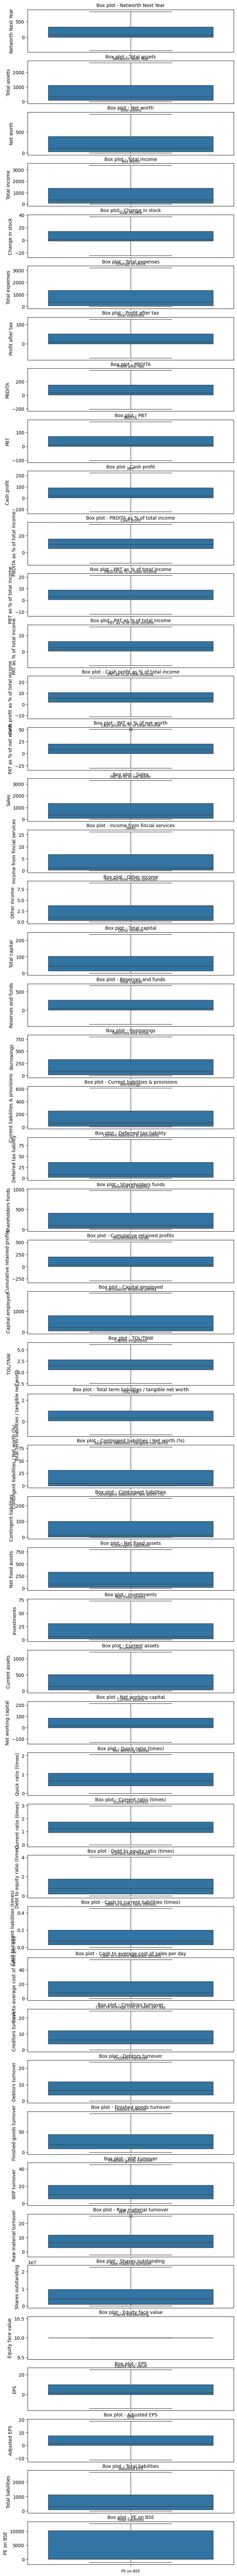

In [17]:
fig, ax = plt.subplots(len(funda_data_imputted.columns), figsize=(8,100))

for i, col_val in enumerate(funda_data_imputted.columns):

    sns.boxplot(y=funda_data_imputted[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.savefig('./images/Box_plots_after_treatment.svg')
plt.show()

#### Spilt Data
Create the Defaulter Traget column
Split the data
They Defaulter column is less then 30% we will use straitify

In [18]:
#Create the Default Column 
funda_data_imputted['Defaulter'] = np.where(funda_data_imputted['Networth Next Year'] <= 0, 1, 0)
#check the % split of the defaulters
funda_data_imputted['Defaulter'].value_counts(normalize=True)*100
#spilt data in 70 30 ratio of train and test 
X = funda_data_imputted.drop(['Defaulter','Networth Next Year'], axis=1).copy()
y = funda_data_imputted['Defaulter'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=123,stratify=funda_data_imputted['Defaulter'])

#### Scale Data
Scaling data as  we want to do Logistic regression in addition to other classification models.
Combine the X and y as will need need them to be together to do supervised classification models. 

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Question 3

### Model Building
We will buil two models Logistic Regression and Radom Forest.
We will check the performance of the two models using metrics of Recall primary as this is Defaulter Classification and compare the other metrics like accuracy, precision etc. once a good recall is found.

In [20]:
log_reg = LogisticRegression(random_state=123, max_iter = 1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred_log_reg = log_reg.predict(X_train_scaled)
y_train_pred_log_reg_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_pred_log_reg = log_reg.predict(X_test_scaled)
y_test_pred_log_reg_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)

y_train_pred_rf = rf.predict(X_train_scaled)
y_train_pred_rf_prob = rf.predict_proba(X_train_scaled)[:, 1]
y_test_pred_rf = rf.predict(X_test_scaled)
y_test_pred_rf_prob = rf.predict_proba(X_test_scaled)[:, 1]

Logistic Regression Train Results
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2356
           1       0.62      0.01      0.02       623

    accuracy                           0.79      2979
   macro avg       0.71      0.50      0.45      2979
weighted avg       0.76      0.79      0.70      2979



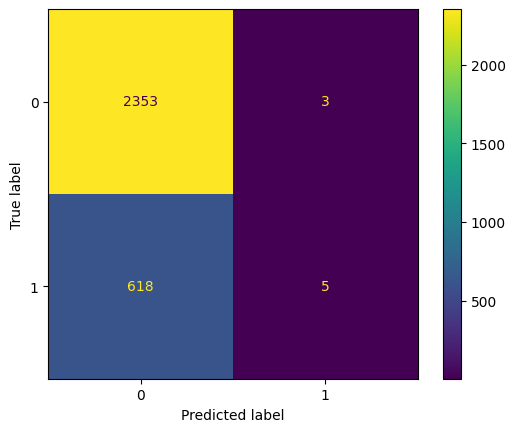

In [21]:
cm_log_reg_train = confusion_matrix(y_train, y_train_pred_log_reg)
cm_log_reg_test = confusion_matrix(y_test, y_test_pred_log_reg)

print('Logistic Regression Train Results')
disp_cm_log_reg_train = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train)
disp_cm_log_reg_train.plot()
print(classification_report(y_train,y_train_pred_log_reg))

Logistic Regression Test Results
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1010
           1       0.75      0.01      0.02       267

    accuracy                           0.79      1277
   macro avg       0.77      0.51      0.45      1277
weighted avg       0.78      0.79      0.70      1277



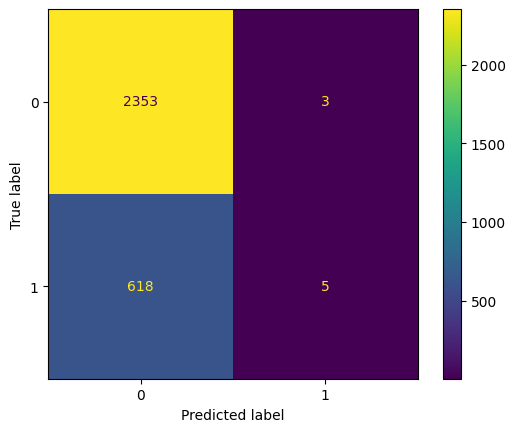

In [22]:
print('Logistic Regression Test Results')
cm_log_reg_test = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train)
cm_log_reg_test.plot()
print(classification_report(y_test,y_test_pred_log_reg))

Random Forest Train Results
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2356
           1       0.92      0.74      0.82       623

    accuracy                           0.93      2979
   macro avg       0.93      0.86      0.89      2979
weighted avg       0.93      0.93      0.93      2979



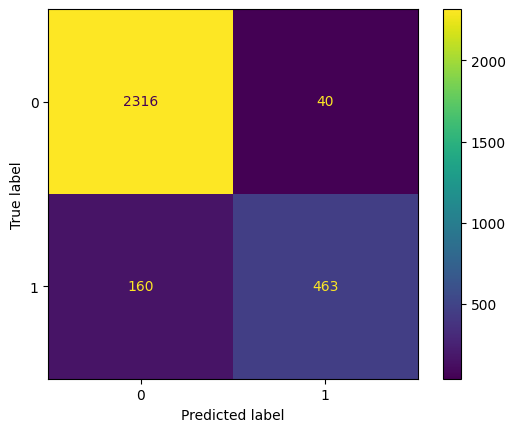

In [23]:
cm_rf_train = confusion_matrix(y_train, y_train_pred_rf)
cm_rf_test = confusion_matrix(y_test, y_test_pred_rf)

print('Random Forest Train Results')
disp_cm_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train)
disp_cm_rf_train.plot()
print(classification_report(y_train,y_train_pred_rf))

Random Forest Test Results
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1010
           1       0.15      0.10      0.12       267

    accuracy                           0.70      1277
   macro avg       0.47      0.48      0.47      1277
weighted avg       0.65      0.70      0.67      1277



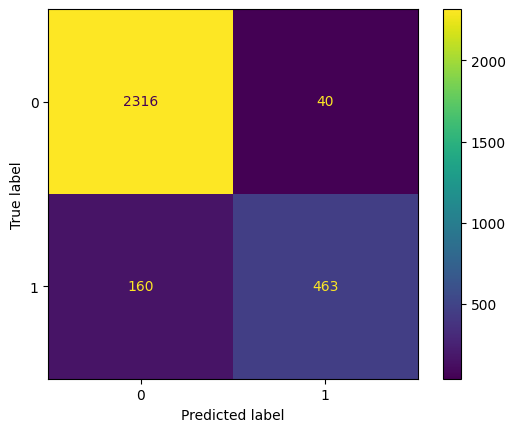

In [24]:
print('Random Forest Test Results')
disp_cm_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train)
disp_cm_rf_train.plot()
print(classification_report(y_test,y_test_pred_rf))

#### Observations
- The Logistic Regresstion model does not perform good with both the train and test data set with the  recall for "Defaulters" only at 0.01 for both.
- The Random Forest model does better performance on train with recall for "Defaulters" only at 0.74 but fails in test with a recall of only 0.10, which tells us it is over fitting

## Question 4

### Model Performance Improvement
- We will try to improve the both the models with using methods like 
    - VIF
    - PValue method
    - Optimal Threshold for Logistic Regression and parameter tunning for Random Forest

#### VIF (Variance Inflation Factor)

In [25]:
def compute_vif(dataframe):
    """
    Compute VIF for each feature in a Pandas DataFrame.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

In [26]:
# Select numeric features
vif_X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns, index=X_train.index).copy()
# Remove Equity Face Value
vif_X_train_scaled.drop(columns='Equity face value',inplace=True)
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

C:\Users\kurtg\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature  VIF
0                                  Total assets  inf
46                            Total liabilities  inf
14                                        Sales   68
2                                  Total income   63
4                                Total expenses   30
1                                     Net worth   18
22                           Shareholders funds   17
7                                           PBT    9
24                             Capital employed    9
5                              Profit after tax    9
6                                        PBDITA    8
8                                   Cash profit    8
10                     PBT as % of total income    7
11                     PAT as % of total income    6
31                               Current assets    6
12             Cash profit as % of total income    6
18                           Reserves and funds    5
29                             Net fixed assets    5
9                   PBDITA as % of total income    5
35                 Debt to equity ratio (times)    4
20             Current liabilities & provisions    4
44                                          EPS    4
45                                 Adjusted EPS    4
23                  Cumulative retained profits    4
43                           Shares outstanding    4
17                                Total capital    4
19                                   Borrowings    4
25                                      TOL/TNW    4
21                       Deferred tax liability    3
33                          Quick ratio (times)    3
34                        Current ratio (times)    3
26  Total term liabilities / tangible net worth    3
36          Cash to current liabilities (times)    3
28                       Contingent liabilities    2
13                        PAT as % of net worth    2
37        Cash to average cost of sales per day    2
41                                 WIP turnover    2
15                 Income from fincial services    2
32                          Net working capital    2
40                      Finished goods turnover    2
39                             Debtors turnover    2
38                           Creditors turnover    2
30                                  Investments    2
27       Contingent liabilities / Net worth (%)    2
16                                 Other income    1
42                        Raw material turnover    1
3                               Change in stock    1
47                                    PE on BSE    1

In [27]:
# removing Total assets 
vif_X_train_scaled.drop(columns='Total assets',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)


Feature  VIF
13                                        Sales   68
1                                  Total income   63
3                                Total expenses   30
0                                     Net worth   18
21                           Shareholders funds   17
45                            Total liabilities   11
6                                           PBT    9
23                             Capital employed    9
4                              Profit after tax    9
5                                        PBDITA    8
7                                   Cash profit    8
9                      PBT as % of total income    7
10                     PAT as % of total income    6
30                               Current assets    6
11             Cash profit as % of total income    6
17                           Reserves and funds    5
28                             Net fixed assets    5
8                   PBDITA as % of total income    5
34                 Debt to equity ratio (times)    4
19             Current liabilities & provisions    4
43                                          EPS    4
44                                 Adjusted EPS    4
22                  Cumulative retained profits    4
42                           Shares outstanding    4
16                                Total capital    4
18                                   Borrowings    4
24                                      TOL/TNW    4
20                       Deferred tax liability    3
32                          Quick ratio (times)    3
33                        Current ratio (times)    3
25  Total term liabilities / tangible net worth    3
35          Cash to current liabilities (times)    3
27                       Contingent liabilities    2
12                        PAT as % of net worth    2
36        Cash to average cost of sales per day    2
40                                 WIP turnover    2
14                 Income from fincial services    2
31                          Net working capital    2
39                      Finished goods turnover    2
38                             Debtors turnover    2
37                           Creditors turnover    2
29                                  Investments    2
26       Contingent liabilities / Net worth (%)    2
15                                 Other income    1
41                        Raw material turnover    1
2                               Change in stock    1
46                                    PE on BSE    1

In [28]:
# removing Sales 
vif_X_train_scaled.drop(columns='Sales',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
1                                  Total income   27
3                                Total expenses   26
0                                     Net worth   18
20                           Shareholders funds   17
44                            Total liabilities   11
22                             Capital employed    9
6                                           PBT    9
4                              Profit after tax    9
5                                        PBDITA    8
7                                   Cash profit    8
9                      PBT as % of total income    7
10                     PAT as % of total income    6
29                               Current assets    6
11             Cash profit as % of total income    6
16                           Reserves and funds    5
27                             Net fixed assets    5
8                   PBDITA as % of total income    5
33                 Debt to equity ratio (times)    4
18             Current liabilities & provisions    4
42                                          EPS    4
43                                 Adjusted EPS    4
21                  Cumulative retained profits    4
41                           Shares outstanding    4
15                                Total capital    4
17                                   Borrowings    4
23                                      TOL/TNW    4
19                       Deferred tax liability    3
31                          Quick ratio (times)    3
32                        Current ratio (times)    3
24  Total term liabilities / tangible net worth    3
34          Cash to current liabilities (times)    3
26                       Contingent liabilities    2
12                        PAT as % of net worth    2
35        Cash to average cost of sales per day    2
39                                 WIP turnover    2
13                 Income from fincial services    2
30                          Net working capital    2
38                      Finished goods turnover    2
37                             Debtors turnover    2
36                           Creditors turnover    2
28                                  Investments    2
25       Contingent liabilities / Net worth (%)    2
14                                 Other income    1
40                        Raw material turnover    1
2                               Change in stock    1
45                                    PE on BSE    1

In [29]:
# removing Total Income 
vif_X_train_scaled.drop(columns='Total income',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
0                                     Net worth   18
19                           Shareholders funds   17
43                            Total liabilities   11
5                                           PBT    9
21                             Capital employed    9
3                              Profit after tax    9
6                                   Cash profit    8
4                                        PBDITA    8
8                      PBT as % of total income    7
9                      PAT as % of total income    6
28                               Current assets    6
10             Cash profit as % of total income    6
15                           Reserves and funds    5
26                             Net fixed assets    5
7                   PBDITA as % of total income    5
2                                Total expenses    5
32                 Debt to equity ratio (times)    4
17             Current liabilities & provisions    4
41                                          EPS    4
42                                 Adjusted EPS    4
20                  Cumulative retained profits    4
40                           Shares outstanding    4
14                                Total capital    4
16                                   Borrowings    4
22                                      TOL/TNW    4
18                       Deferred tax liability    3
30                          Quick ratio (times)    3
31                        Current ratio (times)    3
23  Total term liabilities / tangible net worth    3
33          Cash to current liabilities (times)    3
25                       Contingent liabilities    2
11                        PAT as % of net worth    2
34        Cash to average cost of sales per day    2
38                                 WIP turnover    2
12                 Income from fincial services    2
29                          Net working capital    2
37                      Finished goods turnover    2
36                             Debtors turnover    2
35                           Creditors turnover    2
27                                  Investments    2
24       Contingent liabilities / Net worth (%)    2
13                                 Other income    1
39                        Raw material turnover    1
1                               Change in stock    1
44                                    PE on BSE    1

In [30]:
# removing Net Worth
vif_X_train_scaled.drop(columns='Net worth',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
42                            Total liabilities   11
4                                           PBT    9
20                             Capital employed    9
2                              Profit after tax    9
5                                   Cash profit    8
3                                        PBDITA    8
7                      PBT as % of total income    7
8                      PAT as % of total income    6
27                               Current assets    6
18                           Shareholders funds    6
9              Cash profit as % of total income    6
14                           Reserves and funds    5
25                             Net fixed assets    5
6                   PBDITA as % of total income    5
1                                Total expenses    5
31                 Debt to equity ratio (times)    4
16             Current liabilities & provisions    4
40                                          EPS    4
41                                 Adjusted EPS    4
19                  Cumulative retained profits    4
39                           Shares outstanding    4
13                                Total capital    4
15                                   Borrowings    4
21                                      TOL/TNW    4
17                       Deferred tax liability    3
29                          Quick ratio (times)    3
30                        Current ratio (times)    3
22  Total term liabilities / tangible net worth    3
32          Cash to current liabilities (times)    3
24                       Contingent liabilities    2
10                        PAT as % of net worth    2
33        Cash to average cost of sales per day    2
37                                 WIP turnover    2
11                 Income from fincial services    2
28                          Net working capital    2
36                      Finished goods turnover    2
35                             Debtors turnover    2
34                           Creditors turnover    2
26                                  Investments    2
23       Contingent liabilities / Net worth (%)    2
12                                 Other income    1
38                        Raw material turnover    1
0                               Change in stock    1
43                                    PE on BSE    1

In [31]:
# removing Total liabilities
vif_X_train_scaled.drop(columns='Total liabilities',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
4                                           PBT    9
2                              Profit after tax    9
5                                   Cash profit    8
3                                        PBDITA    8
7                      PBT as % of total income    7
20                             Capital employed    6
8                      PAT as % of total income    6
27                               Current assets    6
9              Cash profit as % of total income    6
18                           Shareholders funds    6
14                           Reserves and funds    5
25                             Net fixed assets    5
6                   PBDITA as % of total income    5
1                                Total expenses    5
31                 Debt to equity ratio (times)    4
40                                          EPS    4
41                                 Adjusted EPS    4
16             Current liabilities & provisions    4
19                  Cumulative retained profits    4
39                           Shares outstanding    4
13                                Total capital    4
15                                   Borrowings    4
21                                      TOL/TNW    4
17                       Deferred tax liability    3
29                          Quick ratio (times)    3
30                        Current ratio (times)    3
22  Total term liabilities / tangible net worth    3
32          Cash to current liabilities (times)    3
24                       Contingent liabilities    2
10                        PAT as % of net worth    2
33        Cash to average cost of sales per day    2
37                                 WIP turnover    2
11                 Income from fincial services    2
28                          Net working capital    2
36                      Finished goods turnover    2
35                             Debtors turnover    2
34                           Creditors turnover    2
26                                  Investments    2
23       Contingent liabilities / Net worth (%)    2
12                                 Other income    1
38                        Raw material turnover    1
0                               Change in stock    1
42                                    PE on BSE    1

In [32]:
# removing PBT
vif_X_train_scaled.drop(columns='PBT',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
3                                        PBDITA    8
4                                   Cash profit    8
6                      PBT as % of total income    7
19                             Capital employed    6
7                      PAT as % of total income    6
26                               Current assets    6
8              Cash profit as % of total income    6
17                           Shareholders funds    6
13                           Reserves and funds    5
24                             Net fixed assets    5
5                   PBDITA as % of total income    5
1                                Total expenses    5
2                              Profit after tax    4
30                 Debt to equity ratio (times)    4
39                                          EPS    4
15             Current liabilities & provisions    4
40                                 Adjusted EPS    4
18                  Cumulative retained profits    4
38                           Shares outstanding    4
12                                Total capital    4
14                                   Borrowings    4
20                                      TOL/TNW    4
16                       Deferred tax liability    3
28                          Quick ratio (times)    3
29                        Current ratio (times)    3
21  Total term liabilities / tangible net worth    3
31          Cash to current liabilities (times)    3
23                       Contingent liabilities    2
9                         PAT as % of net worth    2
32        Cash to average cost of sales per day    2
36                                 WIP turnover    2
10                 Income from fincial services    2
27                          Net working capital    2
35                      Finished goods turnover    2
34                             Debtors turnover    2
33                           Creditors turnover    2
25                                  Investments    2
22       Contingent liabilities / Net worth (%)    2
11                                 Other income    1
37                        Raw material turnover    1
0                               Change in stock    1
41                                    PE on BSE    1

In [33]:
# removing PBDITA
vif_X_train_scaled.drop(columns='PBDITA',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
5                      PBT as % of total income    7
18                             Capital employed    6
6                      PAT as % of total income    6
25                               Current assets    6
16                           Shareholders funds    6
7              Cash profit as % of total income    5
3                                   Cash profit    5
12                           Reserves and funds    5
23                             Net fixed assets    5
1                                Total expenses    5
4                   PBDITA as % of total income    4
2                              Profit after tax    4
29                 Debt to equity ratio (times)    4
38                                          EPS    4
39                                 Adjusted EPS    4
14             Current liabilities & provisions    4
17                  Cumulative retained profits    4
37                           Shares outstanding    4
11                                Total capital    4
13                                   Borrowings    4
19                                      TOL/TNW    4
15                       Deferred tax liability    3
27                          Quick ratio (times)    3
28                        Current ratio (times)    3
20  Total term liabilities / tangible net worth    3
30          Cash to current liabilities (times)    3
22                       Contingent liabilities    2
8                         PAT as % of net worth    2
31        Cash to average cost of sales per day    2
35                                 WIP turnover    2
9                  Income from fincial services    2
26                          Net working capital    2
34                      Finished goods turnover    2
33                             Debtors turnover    2
32                           Creditors turnover    2
24                                  Investments    2
21       Contingent liabilities / Net worth (%)    2
10                                 Other income    1
36                        Raw material turnover    1
0                               Change in stock    1
40                                    PE on BSE    1

In [34]:
# removing PBT as % of total income
vif_X_train_scaled.drop(columns='PBT as % of total income',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
17                             Capital employed    6
24                               Current assets    6
15                           Shareholders funds    6
6              Cash profit as % of total income    5
3                                   Cash profit    5
11                           Reserves and funds    5
22                             Net fixed assets    5
1                                Total expenses    5
4                   PBDITA as % of total income    4
2                              Profit after tax    4
28                 Debt to equity ratio (times)    4
37                                          EPS    4
38                                 Adjusted EPS    4
13             Current liabilities & provisions    4
16                  Cumulative retained profits    4
36                           Shares outstanding    4
10                                Total capital    4
12                                   Borrowings    4
18                                      TOL/TNW    4
5                      PAT as % of total income    3
14                       Deferred tax liability    3
26                          Quick ratio (times)    3
27                        Current ratio (times)    3
19  Total term liabilities / tangible net worth    3
29          Cash to current liabilities (times)    3
21                       Contingent liabilities    2
7                         PAT as % of net worth    2
30        Cash to average cost of sales per day    2
34                                 WIP turnover    2
8                  Income from fincial services    2
25                          Net working capital    2
33                      Finished goods turnover    2
32                             Debtors turnover    2
31                           Creditors turnover    2
23                                  Investments    2
20       Contingent liabilities / Net worth (%)    2
9                                  Other income    1
35                        Raw material turnover    1
0                               Change in stock    1
39                                    PE on BSE    1

In [35]:
# removing Capital employed
vif_X_train_scaled.drop(columns='Capital employed',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
23                               Current assets    6
6              Cash profit as % of total income    5
3                                   Cash profit    5
15                           Shareholders funds    5
11                           Reserves and funds    5
21                             Net fixed assets    5
1                                Total expenses    5
4                   PBDITA as % of total income    4
2                              Profit after tax    4
27                 Debt to equity ratio (times)    4
36                                          EPS    4
37                                 Adjusted EPS    4
13             Current liabilities & provisions    4
16                  Cumulative retained profits    4
35                           Shares outstanding    4
10                                Total capital    4
17                                      TOL/TNW    4
5                      PAT as % of total income    3
12                                   Borrowings    3
14                       Deferred tax liability    3
25                          Quick ratio (times)    3
26                        Current ratio (times)    3
18  Total term liabilities / tangible net worth    3
28          Cash to current liabilities (times)    3
20                       Contingent liabilities    2
7                         PAT as % of net worth    2
29        Cash to average cost of sales per day    2
33                                 WIP turnover    2
8                  Income from fincial services    2
24                          Net working capital    2
32                      Finished goods turnover    2
31                             Debtors turnover    2
30                           Creditors turnover    2
22                                  Investments    2
19       Contingent liabilities / Net worth (%)    2
9                                  Other income    1
34                        Raw material turnover    1
0                               Change in stock    1
38                                    PE on BSE    1

In [36]:
# removing Current assets
vif_X_train_scaled.drop(columns='Current assets',inplace=True)
# Select numeric features
vif_result = compute_vif(vif_X_train_scaled)
vif_result.sort_values(by='VIF', ascending=False)

Feature  VIF
6              Cash profit as % of total income    5
3                                   Cash profit    5
11                           Reserves and funds    5
15                           Shareholders funds    5
21                             Net fixed assets    5
4                   PBDITA as % of total income    4
2                              Profit after tax    4
26                 Debt to equity ratio (times)    4
35                                          EPS    4
36                                 Adjusted EPS    4
1                                Total expenses    4
16                  Cumulative retained profits    4
34                           Shares outstanding    4
10                                Total capital    4
13             Current liabilities & provisions    4
17                                      TOL/TNW    3
5                      PAT as % of total income    3
14                       Deferred tax liability    3
12                                   Borrowings    3
24                          Quick ratio (times)    3
25                        Current ratio (times)    3
18  Total term liabilities / tangible net worth    3
27          Cash to current liabilities (times)    3
20                       Contingent liabilities    2
7                         PAT as % of net worth    2
28        Cash to average cost of sales per day    2
32                                 WIP turnover    2
8                  Income from fincial services    2
23                          Net working capital    2
31                      Finished goods turnover    2
30                             Debtors turnover    2
29                           Creditors turnover    2
22                                  Investments    2
19       Contingent liabilities / Net worth (%)    2
9                                  Other income    1
33                        Raw material turnover    1
0                               Change in stock    1
37                                    PE on BSE    1

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns, index=X_train.index).copy()
X_train_scaled = X_train_scaled[vif_X_train_scaled.columns].copy()

#### The VIF helps drop 11 Features for a thresold of 5, 
- Equity Face values
- Total Assets
- Sales
- Total Income
- Net Worth
- Total Liabilities
- PBT
- -PBDITA
- PBT as a % of Total Income
- Capital Employed
- Current Assets

#### Pvalue Selection

In [38]:
X_with_const = sm.add_constant(X_train_scaled).copy()

In [39]:
logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Change in stock                               0.959
PAT as % of net worth                         0.916
PBDITA as % of total income                   0.887
Quick ratio (times)                           0.878
Net working capital                           0.874
Cumulative retained profits                   0.838
EPS                                           0.774
Borrowings                                    0.765
Contingent liabilities / Net worth (%)        0.748
Net fixed assets                              0.738
Contingent liabilities                        0.727
Total capital                                 0.703
Income from fincial services                  0.689
Finished goods turnover                       0.676
Shares outstanding                            0.674
Deferred tax liability                        0.667
WIP turnover                                  0.666
Cash profit                                   0.661
Other income                              

In [40]:
# Removing p-values of features: Change in stock  
X_with_const.drop(columns='Change in stock',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
PAT as % of net worth                         0.917
PBDITA as % of total income                   0.886
Quick ratio (times)                           0.881
Net working capital                           0.875
Cumulative retained profits                   0.836
EPS                                           0.775
Borrowings                                    0.767
Contingent liabilities / Net worth (%)        0.748
Net fixed assets                              0.738
Contingent liabilities                        0.727
Total capital                                 0.702
Income from fincial services                  0.688
Finished goods turnover                       0.675
Shares outstanding                            0.673
WIP turnover                                  0.667
Deferred tax liability                        0.666
Cash profit                                   0.660
Other income                                  0.621
Debtors turnover                          

In [41]:
# Removing p-values of features: PAT as % of net worth  
X_with_const.drop(columns='PAT as % of net worth',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
PBDITA as % of total income                   0.886
Quick ratio (times)                           0.886
Net working capital                           0.876
Cumulative retained profits                   0.839
EPS                                           0.767
Borrowings                                    0.766
Contingent liabilities / Net worth (%)        0.745
Net fixed assets                              0.733
Contingent liabilities                        0.729
Total capital                                 0.701
Income from fincial services                  0.688
Shares outstanding                            0.675
Finished goods turnover                       0.673
WIP turnover                                  0.669
Deferred tax liability                        0.664
Cash profit                                   0.660
Other income                                  0.620
Debtors turnover                              0.617
Creditors turnover                        

In [42]:
# Removing p-values of features: PBDITA as % of total income   
X_with_const.drop(columns='PBDITA as % of total income',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Quick ratio (times)                           0.886
Net working capital                           0.873
Cumulative retained profits                   0.838
EPS                                           0.765
Borrowings                                    0.760
Contingent liabilities / Net worth (%)        0.743
Net fixed assets                              0.739
Contingent liabilities                        0.726
Total capital                                 0.698
Income from fincial services                  0.687
Shares outstanding                            0.680
Finished goods turnover                       0.674
Cash profit                                   0.666
Deferred tax liability                        0.662
WIP turnover                                  0.659
Other income                                  0.620
Debtors turnover                              0.617
Total term liabilities / tangible net worth   0.607
Creditors turnover                        

In [43]:
# Removing p-values of features: Quick ratio (times)  
X_with_const.drop(columns='Quick ratio (times)',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Net working capital                           0.879
Cumulative retained profits                   0.842
EPS                                           0.766
Borrowings                                    0.749
Contingent liabilities / Net worth (%)        0.743
Net fixed assets                              0.735
Contingent liabilities                        0.723
Total capital                                 0.698
Income from fincial services                  0.683
Shares outstanding                            0.681
Finished goods turnover                       0.677
Cash profit                                   0.661
Deferred tax liability                        0.661
WIP turnover                                  0.644
Debtors turnover                              0.631
Other income                                  0.620
Total term liabilities / tangible net worth   0.611
Creditors turnover                            0.603
Adjusted EPS                              

In [44]:
# Removing p-values of features: Net working capital 
X_with_const.drop(columns='Net working capital',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Cumulative retained profits                   0.852
EPS                                           0.768
Contingent liabilities / Net worth (%)        0.741
Borrowings                                    0.736
Contingent liabilities                        0.724
Net fixed assets                              0.722
Total capital                                 0.701
Shares outstanding                            0.687
Income from fincial services                  0.683
Finished goods turnover                       0.679
Deferred tax liability                        0.661
Cash profit                                   0.657
WIP turnover                                  0.641
Other income                                  0.621
Debtors turnover                              0.621
Creditors turnover                            0.612
Total term liabilities / tangible net worth   0.610
Adjusted EPS                                  0.589
TOL/TNW                                   

In [45]:
# Removing p-values of features: Cumulative retained profits  
X_with_const.drop(columns='Cumulative retained profits',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
EPS                                           0.772
Contingent liabilities / Net worth (%)        0.740
Borrowings                                    0.737
Contingent liabilities                        0.726
Net fixed assets                              0.717
Total capital                                 0.712
Shares outstanding                            0.692
Finished goods turnover                       0.675
Income from fincial services                  0.671
Deferred tax liability                        0.662
Cash profit                                   0.655
WIP turnover                                  0.643
Other income                                  0.629
Debtors turnover                              0.615
Total term liabilities / tangible net worth   0.615
Creditors turnover                            0.603
Adjusted EPS                                  0.592
TOL/TNW                                       0.562
Profit after tax                          

In [46]:
# Removing p-values of features: EPS                 
X_with_const.drop(columns='EPS',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Borrowings                                    0.737
Contingent liabilities / Net worth (%)        0.737
Contingent liabilities                        0.730
Net fixed assets                              0.720
Total capital                                 0.713
Shares outstanding                            0.686
Finished goods turnover                       0.678
Income from fincial services                  0.674
Deferred tax liability                        0.659
Cash profit                                   0.651
WIP turnover                                  0.640
Other income                                  0.632
Debtors turnover                              0.617
Total term liabilities / tangible net worth   0.604
Creditors turnover                            0.600
TOL/TNW                                       0.557
Profit after tax                              0.502
Debt to equity ratio (times)                  0.401
PE on BSE                                 

In [47]:
# Removing p-values of features: Borrowings                                                     
X_with_const.drop(columns='Borrowings',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Net fixed assets                              0.790
Contingent liabilities / Net worth (%)        0.742
Total capital                                 0.731
Contingent liabilities                        0.713
Shares outstanding                            0.693
Finished goods turnover                       0.686
Income from fincial services                  0.685
Cash profit                                   0.652
Deferred tax liability                        0.649
WIP turnover                                  0.637
Other income                                  0.633
Total term liabilities / tangible net worth   0.621
Creditors turnover                            0.618
Debtors turnover                              0.612
TOL/TNW                                       0.551
Profit after tax                              0.494
Debt to equity ratio (times)                  0.421
PE on BSE                                     0.394
PAT as % of total income                  

In [48]:
# Removing p-values of features: Net fixed assets                                                     
X_with_const.drop(columns='Net fixed assets',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Contingent liabilities / Net worth (%)        0.738
Contingent liabilities                        0.723
Total capital                                 0.713
Deferred tax liability                        0.711
Shares outstanding                            0.687
Income from fincial services                  0.683
Finished goods turnover                       0.682
Cash profit                                   0.675
WIP turnover                                  0.635
Other income                                  0.627
Creditors turnover                            0.617
Debtors turnover                              0.604
Total term liabilities / tangible net worth   0.601
TOL/TNW                                       0.549
Profit after tax                              0.482
Debt to equity ratio (times)                  0.418
PE on BSE                                     0.390
PAT as % of total income                      0.350
Current liabilities & provisions          

In [49]:
# Removing p-values of features: Contingent liabilities / Net worth (%)                                                   
X_with_const.drop(columns='Contingent liabilities / Net worth (%)',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Total capital                                 0.729
Deferred tax liability                        0.701
Shares outstanding                            0.679
Cash profit                                   0.679
Income from fincial services                  0.677
Finished goods turnover                       0.677
WIP turnover                                  0.634
Other income                                  0.627
Creditors turnover                            0.615
Debtors turnover                              0.611
Total term liabilities / tangible net worth   0.593
Contingent liabilities                        0.586
TOL/TNW                                       0.530
Profit after tax                              0.483
Debt to equity ratio (times)                  0.426
PE on BSE                                     0.393
PAT as % of total income                      0.357
Investments                                   0.252
Current liabilities & provisions          

In [50]:
# Removing p-values of features: Total capital                                                   
X_with_const.drop(columns='Total capital',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Deferred tax liability                        0.712
Cash profit                                   0.682
Finished goods turnover                       0.674
Income from fincial services                  0.669
WIP turnover                                  0.636
Other income                                  0.630
Debtors turnover                              0.613
Creditors turnover                            0.611
Contingent liabilities                        0.589
Total term liabilities / tangible net worth   0.581
TOL/TNW                                       0.520
Profit after tax                              0.483
Debt to equity ratio (times)                  0.420
PE on BSE                                     0.374
PAT as % of total income                      0.356
Shares outstanding                            0.353
Current liabilities & provisions              0.255
Investments                                   0.251
Adjusted EPS                              

In [51]:
# Removing p-values of features: Deferred tax liability                                                     
X_with_const.drop(columns='Deferred tax liability',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Income from fincial services                  0.677
Finished goods turnover                       0.664
Cash profit                                   0.661
Other income                                  0.650
WIP turnover                                  0.635
Debtors turnover                              0.624
Creditors turnover                            0.607
Total term liabilities / tangible net worth   0.605
Contingent liabilities                        0.554
TOL/TNW                                       0.534
Profit after tax                              0.486
Debt to equity ratio (times)                  0.425
Shares outstanding                            0.375
PE on BSE                                     0.365
PAT as % of total income                      0.352
Investments                                   0.242
Adjusted EPS                                  0.240
Current liabilities & provisions              0.235
Cash to current liabilities (times)       

In [52]:
# Removing p-values of features: Income from fincial services                                                    
X_with_const.drop(columns='Income from fincial services',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Cash profit                                   0.665
Finished goods turnover                       0.650
Debtors turnover                              0.633
Other income                                  0.631
WIP turnover                                  0.625
Total term liabilities / tangible net worth   0.603
Creditors turnover                            0.587
Contingent liabilities                        0.561
TOL/TNW                                       0.528
Profit after tax                              0.475
Debt to equity ratio (times)                  0.423
Shares outstanding                            0.380
PE on BSE                                     0.380
PAT as % of total income                      0.343
Investments                                   0.269
Current liabilities & provisions              0.251
Adjusted EPS                                  0.244
Cash to current liabilities (times)           0.184
Shareholders funds                        

In [53]:
# Removing p-values of features: Cash profit                                                    
X_with_const.drop(columns='Cash profit',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Finished goods turnover                       0.663
WIP turnover                                  0.643
Other income                                  0.628
Debtors turnover                              0.627
Total term liabilities / tangible net worth   0.606
Creditors turnover                            0.598
Contingent liabilities                        0.554
TOL/TNW                                       0.519
Debt to equity ratio (times)                  0.427
Shares outstanding                            0.394
PE on BSE                                     0.385
PAT as % of total income                      0.289
Investments                                   0.280
Profit after tax                              0.259
Current liabilities & provisions              0.240
Adjusted EPS                                  0.228
Cash to current liabilities (times)           0.179
Shareholders funds                            0.165
Cash to average cost of sales per day     

In [54]:
# Removing p-values of features: Finished goods turnover                                                   
X_with_const.drop(columns='Finished goods turnover',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
WIP turnover                                  0.810
Other income                                  0.626
Debtors turnover                              0.621
Total term liabilities / tangible net worth   0.598
Creditors turnover                            0.596
Contingent liabilities                        0.561
TOL/TNW                                       0.507
Debt to equity ratio (times)                  0.422
Shares outstanding                            0.404
PE on BSE                                     0.386
PAT as % of total income                      0.302
Investments                                   0.284
Profit after tax                              0.258
Current liabilities & provisions              0.237
Adjusted EPS                                  0.225
Cash to current liabilities (times)           0.175
Shareholders funds                            0.164
Cash to average cost of sales per day         0.058
Total expenses                            

In [55]:
# Removing p-values of features: WIP turnover                                                   
X_with_const.drop(columns='WIP turnover',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Other income                                  0.636
Debtors turnover                              0.616
Total term liabilities / tangible net worth   0.594
Creditors turnover                            0.571
Contingent liabilities                        0.561
TOL/TNW                                       0.510
Debt to equity ratio (times)                  0.428
Shares outstanding                            0.409
PE on BSE                                     0.386
PAT as % of total income                      0.301
Investments                                   0.283
Profit after tax                              0.257
Current liabilities & provisions              0.236
Adjusted EPS                                  0.228
Cash to current liabilities (times)           0.181
Shareholders funds                            0.165
Cash to average cost of sales per day         0.060
Total expenses                                0.054
Raw material turnover                     

In [56]:
# Removing p-values of features: Other income                                                    
X_with_const.drop(columns='Other income',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Debtors turnover                              0.624
Total term liabilities / tangible net worth   0.603
Creditors turnover                            0.575
Contingent liabilities                        0.573
TOL/TNW                                       0.515
Debt to equity ratio (times)                  0.422
Shares outstanding                            0.398
PE on BSE                                     0.396
PAT as % of total income                      0.305
Investments                                   0.294
Current liabilities & provisions              0.255
Profit after tax                              0.253
Adjusted EPS                                  0.240
Cash to current liabilities (times)           0.183
Shareholders funds                            0.154
Cash to average cost of sales per day         0.061
Total expenses                                0.048
Raw material turnover                         0.044
Current ratio (times)                     

In [57]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Debtors turnover',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Contingent liabilities                        0.586
Total term liabilities / tangible net worth   0.579
TOL/TNW                                       0.528
Debt to equity ratio (times)                  0.433
Creditors turnover                            0.427
Shares outstanding                            0.402
PE on BSE                                     0.381
PAT as % of total income                      0.306
Investments                                   0.288
Current liabilities & provisions              0.249
Adjusted EPS                                  0.249
Profit after tax                              0.245
Cash to current liabilities (times)           0.203
Shareholders funds                            0.148
Cash to average cost of sales per day         0.068
Raw material turnover                         0.050
Total expenses                                0.042
Cash profit as % of total income              0.025
Current ratio (times)                     

In [58]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Contingent liabilities',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Total term liabilities / tangible net worth   0.586
TOL/TNW                                       0.526
Shares outstanding                            0.446
Debt to equity ratio (times)                  0.436
Creditors turnover                            0.430
PE on BSE                                     0.378
PAT as % of total income                      0.298
Investments                                   0.269
Profit after tax                              0.244
Adjusted EPS                                  0.237
Current liabilities & provisions              0.219
Cash to current liabilities (times)           0.195
Shareholders funds                            0.165
Cash to average cost of sales per day         0.066
Raw material turnover                         0.050
Total expenses                                0.049
Cash profit as % of total income              0.024
Current ratio (times)                         0.019
Reserves and funds                        

In [59]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Total term liabilities / tangible net worth',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
TOL/TNW                                 0.597
Creditors turnover                      0.439
Shares outstanding                      0.424
PE on BSE                               0.368
PAT as % of total income                0.309
Investments                             0.265
Profit after tax                        0.245
Adjusted EPS                            0.231
Debt to equity ratio (times)            0.217
Cash to current liabilities (times)     0.208
Current liabilities & provisions        0.207
Shareholders funds                      0.157
Cash to average cost of sales per day   0.070
Raw material turnover                   0.048
Total expenses                          0.048
Cash profit as % of total income        0.027
Current ratio (times)                   0.020
Reserves and funds                      0.001
const                                   0.000
dtype: float64


In [60]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='TOL/TNW',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Creditors turnover                      0.414
Shares outstanding                      0.397
PE on BSE                               0.367
PAT as % of total income                0.308
Investments                             0.279
Profit after tax                        0.247
Adjusted EPS                            0.227
Cash to current liabilities (times)     0.222
Debt to equity ratio (times)            0.205
Current liabilities & provisions        0.160
Shareholders funds                      0.142
Cash to average cost of sales per day   0.074
Total expenses                          0.048
Raw material turnover                   0.042
Cash profit as % of total income        0.029
Current ratio (times)                   0.023
Reserves and funds                      0.001
const                                   0.000
dtype: float64


In [61]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Creditors turnover',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Shares outstanding                      0.384
PE on BSE                               0.342
PAT as % of total income                0.312
Investments                             0.271
Profit after tax                        0.250
Cash to current liabilities (times)     0.243
Adjusted EPS                            0.235
Debt to equity ratio (times)            0.179
Shareholders funds                      0.130
Current liabilities & provisions        0.098
Cash to average cost of sales per day   0.089
Raw material turnover                   0.062
Total expenses                          0.034
Cash profit as % of total income        0.032
Current ratio (times)                   0.031
Reserves and funds                      0.001
const                                   0.000
dtype: float64


In [62]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Shares outstanding',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
PE on BSE                               0.439
Investments                             0.307
PAT as % of total income                0.299
Profit after tax                        0.271
Cash to current liabilities (times)     0.222
Debt to equity ratio (times)            0.170
Adjusted EPS                            0.157
Current liabilities & provisions        0.107
Cash to average cost of sales per day   0.083
Shareholders funds                      0.066
Raw material turnover                   0.057
Cash profit as % of total income        0.035
Current ratio (times)                   0.032
Total expenses                          0.023
Reserves and funds                      0.000
const                                   0.000
dtype: float64


In [63]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='PE on BSE',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
PAT as % of total income                0.306
Investments                             0.304
Profit after tax                        0.240
Cash to current liabilities (times)     0.230
Adjusted EPS                            0.206
Debt to equity ratio (times)            0.161
Current liabilities & provisions        0.111
Cash to average cost of sales per day   0.086
Shareholders funds                      0.067
Raw material turnover                   0.056
Cash profit as % of total income        0.035
Current ratio (times)                   0.028
Total expenses                          0.024
Reserves and funds                      0.000
const                                   0.000
dtype: float64


In [64]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='PAT as % of total income',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Profit after tax                        0.359
Investments                             0.322
Adjusted EPS                            0.266
Cash to current liabilities (times)     0.239
Debt to equity ratio (times)            0.196
Current liabilities & provisions        0.106
Cash to average cost of sales per day   0.082
Shareholders funds                      0.071
Cash profit as % of total income        0.058
Raw material turnover                   0.054
Current ratio (times)                   0.028
Total expenses                          0.024
Reserves and funds                      0.000
const                                   0.000
dtype: float64


In [65]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Profit after tax',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Investments                             0.321
Cash to current liabilities (times)     0.232
Debt to equity ratio (times)            0.191
Adjusted EPS                            0.165
Shareholders funds                      0.087
Cash to average cost of sales per day   0.078
Current liabilities & provisions        0.076
Raw material turnover                   0.049
Total expenses                          0.032
Current ratio (times)                   0.027
Cash profit as % of total income        0.022
Reserves and funds                      0.000
const                                   0.000
dtype: float64


In [66]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Investments',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Cash to current liabilities (times)     0.234
Debt to equity ratio (times)            0.170
Adjusted EPS                            0.170
Shareholders funds                      0.132
Cash to average cost of sales per day   0.088
Current liabilities & provisions        0.067
Raw material turnover                   0.055
Total expenses                          0.034
Current ratio (times)                   0.034
Cash profit as % of total income        0.019
Reserves and funds                      0.000
const                                   0.000
dtype: float64


In [67]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Cash to current liabilities (times)',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Cash to average cost of sales per day   0.226
Adjusted EPS                            0.161
Shareholders funds                      0.119
Debt to equity ratio (times)            0.105
Current liabilities & provisions        0.080
Raw material turnover                   0.047
Total expenses                          0.042
Cash profit as % of total income        0.022
Current ratio (times)                   0.009
Reserves and funds                      0.000
const                                   0.000
dtype: float64


In [68]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Cash to average cost of sales per day',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Adjusted EPS                       0.149
Debt to equity ratio (times)       0.130
Shareholders funds                 0.105
Current liabilities & provisions   0.098
Total expenses                     0.057
Cash profit as % of total income   0.035
Raw material turnover              0.030
Current ratio (times)              0.013
Reserves and funds                 0.000
const                              0.000
dtype: float64


In [69]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Adjusted EPS',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Debt to equity ratio (times)       0.110
Current liabilities & provisions   0.086
Total expenses                     0.078
Shareholders funds                 0.074
Raw material turnover              0.019
Current ratio (times)              0.011
Cash profit as % of total income   0.007
Reserves and funds                 0.000
const                              0.000
dtype: float64


In [70]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Debt to equity ratio (times)',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Current liabilities & provisions   0.101
Shareholders funds                 0.095
Total expenses                     0.044
Raw material turnover              0.025
Current ratio (times)              0.005
Cash profit as % of total income   0.004
Reserves and funds                 0.000
const                              0.000
dtype: float64


In [71]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Current liabilities & provisions',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Shareholders funds                 0.213
Total expenses                     0.186
Raw material turnover              0.028
Current ratio (times)              0.010
Cash profit as % of total income   0.003
Reserves and funds                 0.000
const                              0.000
dtype: float64


In [72]:
# Removing High p-values of features                                                    
X_with_const.drop(columns='Shareholders funds',inplace=True)

logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit(disp=False)  # Suppress output during fitting
    
# Get p-values for all features
p_values = result.pvalues
print("p-values of features:")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(p_values.sort_values(ascending = False))

p-values of features:
Raw material turnover              0.022
Total expenses                     0.020
Current ratio (times)              0.012
Cash profit as % of total income   0.005
Reserves and funds                 0.000
const                              0.000
dtype: float64


#### After Pvalue Selection we have 5 Features

In [73]:
X_with_const.drop(columns='const',inplace=True)

In [74]:
X_train_scaled = X_train_scaled[X_with_const.columns].copy()
X_train_scaled.info()
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns, index=X_test.index).copy()
X_test_scaled = X_test_scaled[X_with_const.columns].copy()
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 3844 to 1257
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total expenses                    2979 non-null   float64
 1   Cash profit as % of total income  2979 non-null   float64
 2   Reserves and funds                2979 non-null   float64
 3   Current ratio (times)             2979 non-null   float64
 4   Raw material turnover             2979 non-null   float64
dtypes: float64(5)
memory usage: 139.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 3062 to 4134
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total expenses                    1277 non-null   float64
 1   Cash profit as % of total income  1277 non-null   float64
 2   Reserves and funds                1277 non-null   fl

#### Logistic Regssion running the model with reduced features and ploting the roc cuve for threshold

In [75]:
log_reg = LogisticRegression(random_state=123, max_iter = 1000)
log_reg.fit(X_train_scaled, y_train)

y_train_pred_log_reg = log_reg.predict(X_train_scaled)
y_train_pred_log_reg_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_pred_log_reg = log_reg.predict(X_test_scaled)
y_test_pred_log_reg_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

Logistic Regression Train Results
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2356
           1       0.50      0.00      0.00       623

    accuracy                           0.79      2979
   macro avg       0.65      0.50      0.44      2979
weighted avg       0.73      0.79      0.70      2979



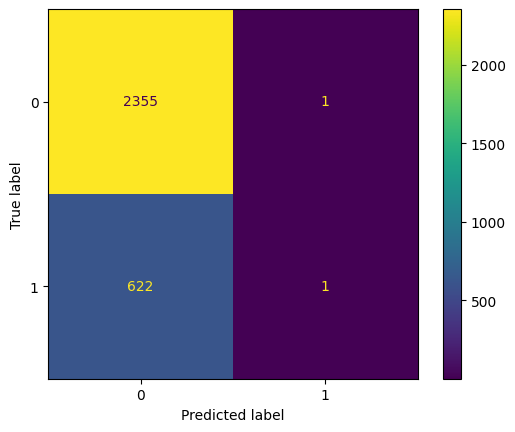

In [76]:
cm_log_reg_train = confusion_matrix(y_train, y_train_pred_log_reg)
cm_log_reg_test = confusion_matrix(y_test, y_test_pred_log_reg)

print('Logistic Regression Train Results')
disp_cm_log_reg_train = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train)
disp_cm_log_reg_train.plot()
print(classification_report(y_train,y_train_pred_log_reg))

Logistic Regression Test Results
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1010
           1       1.00      0.00      0.01       267

    accuracy                           0.79      1277
   macro avg       0.90      0.50      0.45      1277
weighted avg       0.84      0.79      0.70      1277



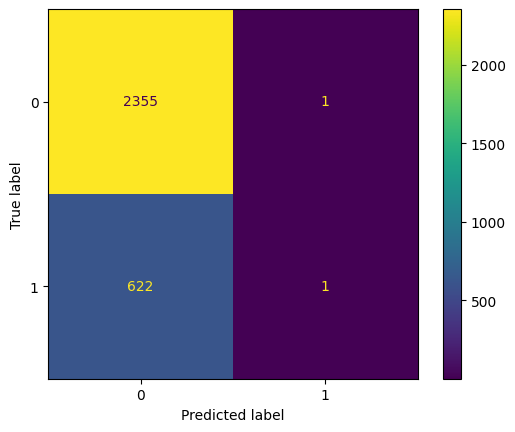

In [77]:
print('Logistic Regression Test Results')
cm_log_reg_test = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train)
cm_log_reg_test.plot()
print(classification_report(y_test,y_test_pred_log_reg))

#### Ploting ROC Curve

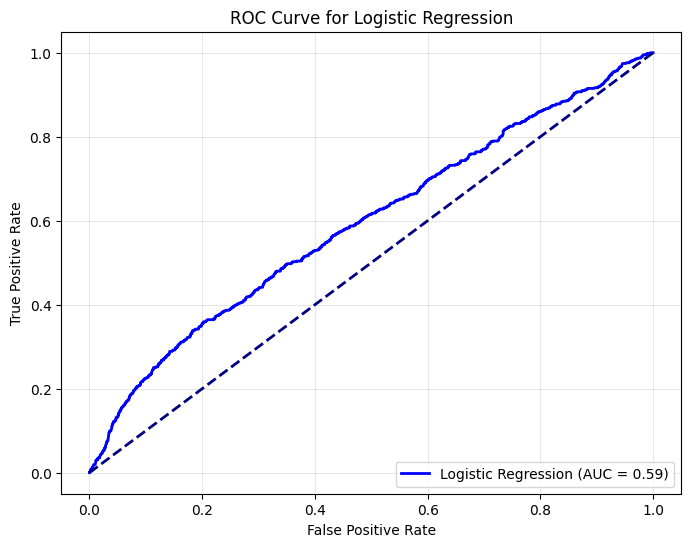

Optimal Threshold: 0.24407086297875977


In [78]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_log_reg_prob)
roc_auc = roc_auc_score(y_train, y_train_pred_log_reg_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.savefig('./images/ROC_Curve.svg')
plt.show()

# Calculate Youden's J statistic
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

#### Getting the Target as per the threshold

In [79]:
y_pred_optimal = (y_train_pred_log_reg_prob >= optimal_threshold).astype(int)

In [80]:
y_pred_test_optimal = (y_test_pred_log_reg_prob >= optimal_threshold).astype(int)

In [81]:
cm_log_reg_train = confusion_matrix(y_train, y_pred_optimal)
cm_log_reg_test = confusion_matrix(y_test, y_pred_test_optimal)

Logistic Regression Train Results as of Threshold
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2356
           1       0.32      0.36      0.34       623

    accuracy                           0.71      2979
   macro avg       0.57      0.58      0.57      2979
weighted avg       0.72      0.71      0.71      2979



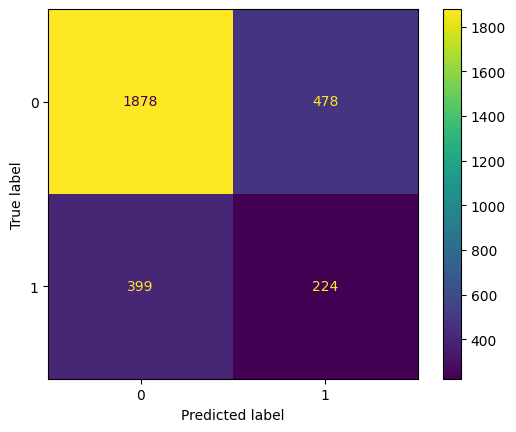

In [82]:
print('Logistic Regression Train Results as of Threshold')
cm_log_reg_train = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train)
cm_log_reg_train.plot()
print(classification_report(y_train,y_pred_optimal))

Logistic Regression Test Results as of Threshold
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2356
           1       0.32      0.36      0.34       623

    accuracy                           0.71      2979
   macro avg       0.57      0.58      0.57      2979
weighted avg       0.72      0.71      0.71      2979



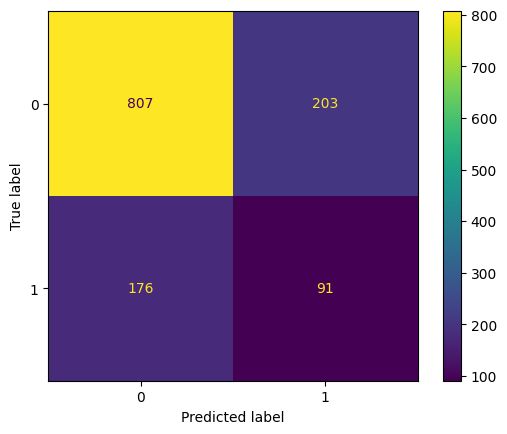

In [83]:
print('Logistic Regression Test Results as of Threshold')
ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_test).plot()
print(classification_report(y_train,y_pred_optimal))

#### Still The Logistic Model is not performing good based on the recall which is only in the 30%

#### Hypertuning for Random Forest

In [84]:
# Commeting this cell not to run
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2', None]    # Number of features to consider when looking for the best split
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    verbose=2,           # Display progress
    n_jobs=-1            # Use all available cores
)

#grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters and corresponding score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

# Display the results
#print("Best Parameters:")
#print(best_params)
#print("\nBest Recall:")
#print(best_score)

#### Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Recall: 0.07703225806451612

#### Applying the parameters to the Random forest model

In [85]:
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth= None, max_features= None, min_samples_leaf= 4, min_samples_split=10 )
rf.fit(X_train_scaled, y_train)
y_train_pred_rf = rf.predict(X_train_scaled)
y_train_pred_rf_prob = rf.predict_proba(X_train_scaled)[:, 1]
y_test_pred_rf = rf.predict(X_test_scaled)
y_test_pred_rf_prob = rf.predict_proba(X_test_scaled)[:, 1]

In [86]:
cm_rf_train = confusion_matrix(y_train, y_train_pred_rf)
cm_rf_test = confusion_matrix(y_test, y_test_pred_rf)

Random Forest Train Results
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2356
           1       0.86      0.20      0.32       623

    accuracy                           0.83      2979
   macro avg       0.84      0.59      0.61      2979
weighted avg       0.83      0.83      0.78      2979



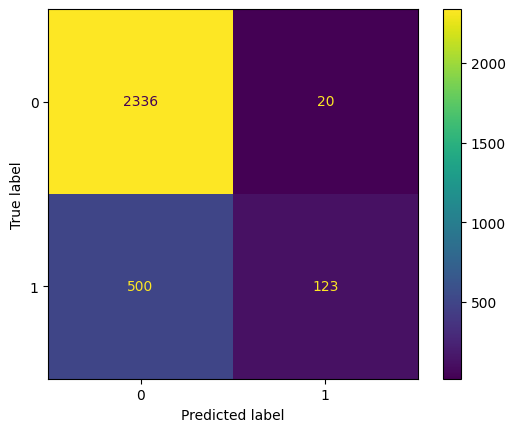

In [87]:
print('Random Forest Train Results')
disp_cm_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train)
disp_cm_rf_train.plot()
print(classification_report(y_train,y_train_pred_rf))

Random Forest Test Results
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1010
           1       0.35      0.09      0.14       267

    accuracy                           0.78      1277
   macro avg       0.58      0.52      0.51      1277
weighted avg       0.71      0.78      0.72      1277



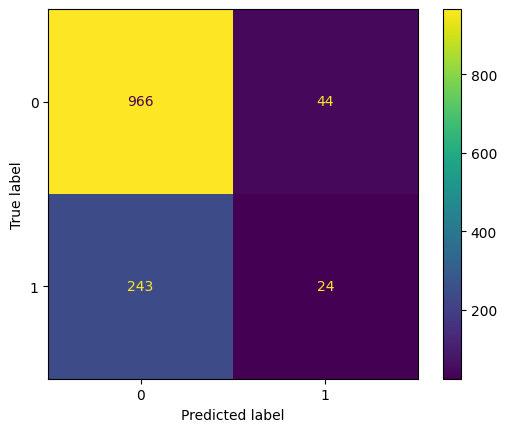

In [88]:
print('Random Forest Test Results')
disp_cm_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_test)
disp_cm_rf_train.plot()
print(classification_report(y_test,y_test_pred_rf))

#### Using SMOTE to Balance the split of the defaults in the data

In [89]:
# recreate the data
#Create the Default Column 
funda_data_imputted['Defaulter'] = np.where(funda_data_imputted['Networth Next Year'] <= 0, 1, 0)
#check the % split of the defaulters
funda_data_imputted['Defaulter'].value_counts(normalize=True)*100
#spilt data in 70 30 ratio of train and test 
X = funda_data_imputted.drop(['Defaulter','Networth Next Year'], axis=1).copy()
y = funda_data_imputted['Defaulter'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=123,stratify=funda_data_imputted['Defaulter'])

In [90]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.75,random_state=42)

# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [92]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train_resampled.columns, index=X_train_resampled.index).copy()
X_train_scaled = X_train_scaled[X_with_const.columns].copy()
X_train_scaled.info()
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns, index=X_test.index).copy()
X_test_scaled = X_test_scaled[X_with_const.columns].copy()
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total expenses                    4123 non-null   float64
 1   Cash profit as % of total income  4123 non-null   float64
 2   Reserves and funds                4123 non-null   float64
 3   Current ratio (times)             4123 non-null   float64
 4   Raw material turnover             4123 non-null   float64
dtypes: float64(5)
memory usage: 161.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 3062 to 4134
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total expenses                    1277 non-null   float64
 1   Cash profit as % of total income  1277 non-null   float64
 2   Reserves and funds                1277 non-null   

#### Logistic regression Post SMOTE

In [93]:
log_reg = LogisticRegression(random_state=123, max_iter = 1000)
log_reg.fit(X_train_scaled, y_train_resampled)

y_train_pred_log_reg = log_reg.predict(X_train_scaled)
y_train_pred_log_reg_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_pred_log_reg = log_reg.predict(X_test_scaled)
y_test_pred_log_reg_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [94]:
cm_log_reg_train = confusion_matrix(y_train_resampled, y_train_pred_log_reg)
cm_log_reg_test = confusion_matrix(y_test, y_test_pred_log_reg)

Logistic Regression Train Results as of Threshold
              precision    recall  f1-score   support

           0       0.61      0.88      0.72      2356
           1       0.59      0.24      0.34      1767

    accuracy                           0.60      4123
   macro avg       0.60      0.56      0.53      4123
weighted avg       0.60      0.60      0.56      4123



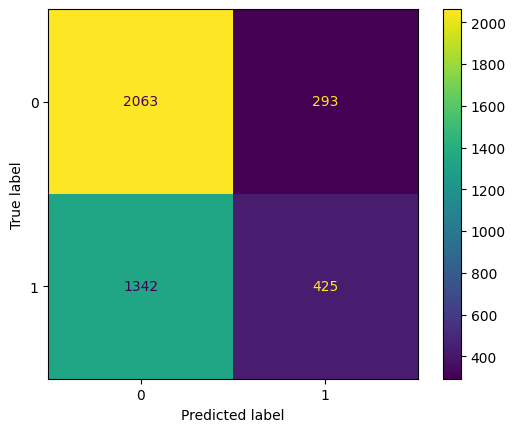

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
print('Logistic Regression Train Results as of Threshold')
cm_log_reg_train = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train)
cm_log_reg_train.plot()
print(classification_report(y_train_resampled,y_train_pred_log_reg))

Logistic Regression Test Results as of Threshold
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1010
           1       0.35      0.25      0.29       267

    accuracy                           0.74      1277
   macro avg       0.58      0.56      0.57      1277
weighted avg       0.72      0.74      0.73      1277



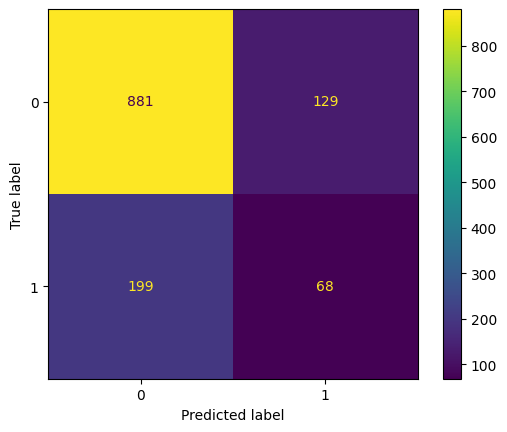

In [96]:
print('Logistic Regression Test Results as of Threshold')
ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_test).plot()
print(classification_report(y_test,y_test_pred_log_reg))

#### Random Forest Post SMOTE

In [97]:
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth= None, max_features= None, min_samples_leaf= 4, min_samples_split=10 )
rf.fit(X_train_scaled, y_train_resampled)
y_train_pred_rf = rf.predict(X_train_scaled)
y_train_pred_rf_prob = rf.predict_proba(X_train_scaled)[:, 1]
y_test_pred_rf = rf.predict(X_test_scaled)
y_test_pred_rf_prob = rf.predict_proba(X_test_scaled)[:, 1]

In [98]:
cm_rf_train = confusion_matrix(y_train_resampled, y_train_pred_rf)
cm_rf_test = confusion_matrix(y_test, y_test_pred_rf)

Random Forest Train Results
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2356
           1       0.91      0.83      0.86      1767

    accuracy                           0.89      4123
   macro avg       0.89      0.88      0.88      4123
weighted avg       0.89      0.89      0.89      4123



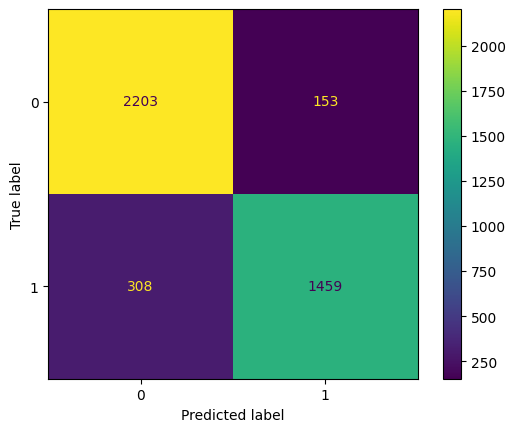

In [99]:
print('Random Forest Train Results')
disp_cm_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train)
disp_cm_rf_train.plot()
print(classification_report(y_train_resampled,y_train_pred_rf))

Random Forest Test Results
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1010
           1       0.17      0.22      0.19       267

    accuracy                           0.61      1277
   macro avg       0.47      0.46      0.47      1277
weighted avg       0.65      0.61      0.63      1277



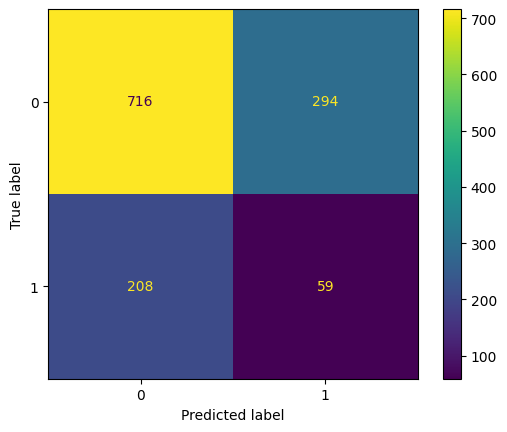

In [100]:
print('Random Forest Test Results')
disp_cm_rf_train = ConfusionMatrixDisplay(confusion_matrix=cm_rf_test)
disp_cm_rf_train.plot()
print(classification_report(y_test,y_test_pred_rf))

## Question 5

### Model Performance Comparison

#### Logistic regression and Random Forest are not the most suitable models for this classification problem
- We did get better and between in each step
    - From base to VIF and P value Treatment to SMOTE
- We would need to look at other methods like PCA or other modell like boosting/bagging to see if we can get a better model
- The final recall on Test by the models were  0.25 for LR and 0.22 for Random Forest which was much better than the 0.01 for LR adn 0.10 for RF what we started with, but both these two models will not work in this case.
- important Feature list post VIF and Pvalue elimination are ordered as:
    - Raw material turnover              0.022
    - Total expenses                     0.020
    - Current ratio (times)              0.012
    - Cash profit as % of total income   0.005
    - Reserves and funds                 0.000 

## Question 6

### Actionable Insights & Recommendations
#### We would need to look at other methods like PCA or other modell like boosting/bagging to see if we can get a better model

# Part B

## Question 1

### Draw a Stock Price Graph (Stock Price vs Time) for the given stocks - Write observations

In [101]:
stock_data = pd.read_csv('./data/Market_Risk_Data_coded.csv')
stock_data.head()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0  28-03-2016          217            316          386          114       173
1  04-04-2016          218            302          386          121       171
2  11-04-2016          215            308          374          120       171
3  18-04-2016          223            320          408          122       172
4  25-04-2016          214            319          418          122       175

In [102]:
stock_data.isnull().sum()

Date             0
ITC Limited      0
Bharti Airtel    0
Tata Motors      0
DLF Limited      0
Yes Bank         0
dtype: int64

In [103]:
# Convert the 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')

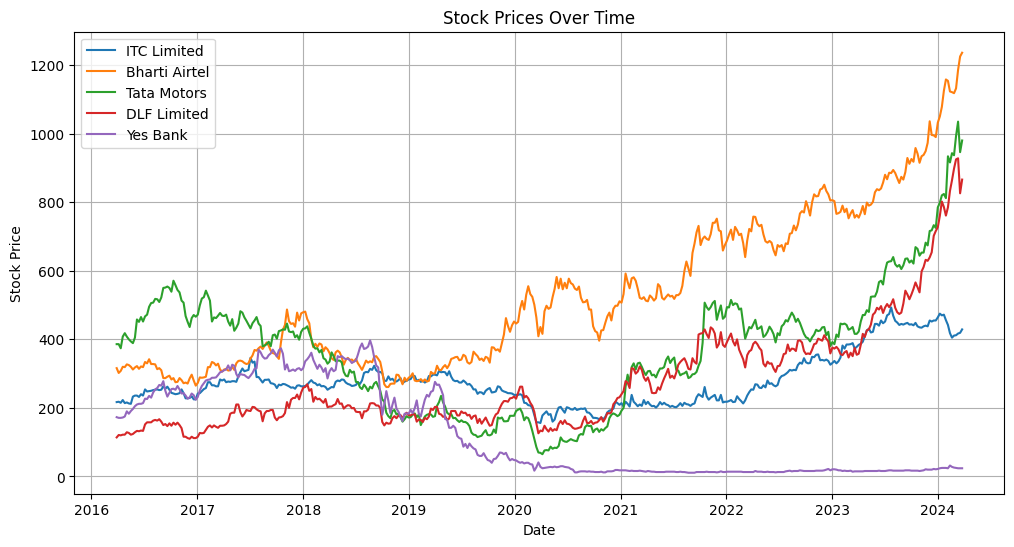

In [104]:
# Plot stock prices over time
plt.figure(figsize=(12, 6))
for column in stock_data.columns[1:]:
    plt.plot(stock_data['Date'], stock_data[column], label=column)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.savefig('./images/Stock_Price_Trend.svg')
plt.show()

### Observations
    - The graph shows the stock price trends for all five stocks over the given period.
    - Some stocks show consistent growth, while others exhibit high volatility or downward trends.
    - Bharti Airtel has the highest gains vs Yes Bank who has the least

## Question 2

### Stock Returns Calculation and Analysis

### Calculate Returns for all stocks

In [105]:
# Calculate weekly returns for each stock
returns = stock_data.set_index('Date').pct_change() * 100  # Returns in percentage

### Calculate the Mean and Standard Deviation for the returns of all stocks

In [106]:
mean_returns = returns.mean()
std_dev_returns = returns.std()

### Draw a plot of Mean vs Standard Deviation for all stock returns

C:\Users\kurtg\AppData\Local\Temp\ipykernel_20096\1342566305.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(std_dev_returns[i], mean_returns[i], stock, fontsize=9, ha='right')


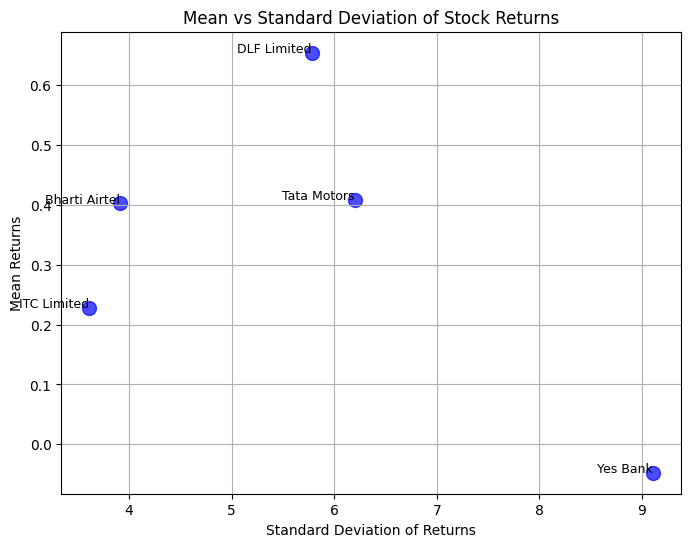

In [107]:
# Create a plot of Mean vs Standard Deviation for stock returns
plt.figure(figsize=(8, 6))
plt.scatter(std_dev_returns, mean_returns, color='b', s=100, alpha=0.7)
for i, stock in enumerate(mean_returns.index):
    plt.text(std_dev_returns[i], mean_returns[i], stock, fontsize=9, ha='right')

plt.title('Mean vs Standard Deviation of Stock Returns')
plt.xlabel('Standard Deviation of Returns')
plt.ylabel('Mean Returns')
plt.grid()
plt.savefig('./images/Stock_Returns_Mean_vs_STD.svg')
plt.show()

### Observations and Inferences
    - The mean returns indicate the average performance of each stock.
    - The standard deviation of returns shows the volatility (risk) associated with each stock.
    - The Mean vs Standard Deviation plot highlights which stocks offer higher returns for a given level of risk.
    - Bharti Airtel and ITC Limited give mid range returns for the least volatity, DLF and Tata have higher returns than them but have mid range volatility, Yes Bank has the least returns and the most volatility

## Question 3

### Actionable insights and recommendations
    - High-return stocks with low volatility are ideal for risk-averse investors.(Airtel/ITC)
    - Stocks with high volatility but significant returns might be suitable for risk-tolerant investors.(DLF/Tata)
    - Portfolio diversification can balance high-return and low-risk stocks to achieve an optimal risk-adjusted return.(Mix of the above)